# Introduction

Some of the Wold lab low input RNA-Seq libraries accidentially went through the normal RNA-Seq pipeline, and performed poorer than we expected. This turned out to be because we were incorrectly computing the Pearson and Spearman correlations.

However we also discovered that the experimental single-cell like 13 picogram data would never meet the robustness of experiments with larger starting nucleic acid amounts. One important question that was raised was is there a way to verify that the 13 picogram experiments were of sufficiently quality to be used by others.

# Analysis

* <a href="#Plot-Correlations">Plot Correlations</a>
  * <a href="#Naive-Pearson-Comparison">Naive Pearson</a>
  * <a href="#Naive-Spearman-Comparison">Naive Spearman</a>
  * <a href="#Rafa-Pearson-Comparison">Rafa Pearson</a>
  * <a href="#Rafa-Spearman-Comparison">Rafa Spearman</a>
  * <a href="#Rafa-MAD-Comparison">MAD of Log Ratios</a>
  * <a href="#Rafa-SD-Comparison">SD of Log Ratios</a>
* <a href="#Scores-by-experiment-set">Scores by experiment set</a>
  * <a href="#All-13-pg-scores">13 pg scores</a>
  * <a href="#All-10-ng-scores">10 ng scores</a>
  * <a href="#pool/split-scores">C57Bl6 Layer V Pyramidal neuron pool-split</a>
* <a href="#Fractions-Passed-Filters">Fraction passed Acutoff threshold of 0</a>
* <a href="#Replicate-vs-Replicate-Scatter-Plots">Replicate vs Replicate Scatter Plots</a> 
  At the time of writing this notebook I only found two experiments with matching life stage and tissues: e11.5 forebrain and e11.5 liver.
  * <a href="#Compare-10-ng-e11.5-forebrain-to-13-pg-e11.5-forebrain">Compare 10 ng and 13 pg e11.5 forebrain</a>
  * <a href="#Compare-10-ng-e11.5-liver-to-13-pg-e11.5-liver">Compare 10 ng and 13 pg e11.5 liver</a>
  * <a href="#Compare-10ng-forebrain-to-best-pool/split">Compare 10ng to best pool split</a>
  * <a href="#Compare-10ng-forebrain-to-worst-pool/split">Compare 10ng to worst pool split</a>
  * <a href="#Compare-13-pg-forebrain-to-best-pool-split">Compare 13pg to best pool split</a>
* <a href="#How-many-genes-are-detected">How many genes are detected</a>
  * <a href="#Plot-10ng-vs-13pg-detected-gene-sets">How many genes are in the intesection and set differences</a>
  * <a href="#Genes-only-in-13-pg-forebrain-with-fpkm-%3E-1">Genes only in 13 pg forebrain with fpkm > 1</a>
  * <a href="#Genes-only-in-13-pg-liver-with-fpkm-%3E-1">Genes only in 13 pg liver with fpkm > 1</a>
* <a href="#Sliding-window-reporting-fraction-of-genes-detected-by-fpkm">Sliding window reporting fraction of genes detected by FPKM</a>
  * <a href="#e11.5-forebrain-fraction-non-null-observations">e11.5 forebrain fraction of genes detected</a>
  * <a href="#e11.5-liver-fraction-non-null-observations">e11.5 liver fraction of genes detected</a>
* <a href="#Sweep-over-Acutoff-values">Sweep over Acutoff values</a>
  * <a href="#13-pg-Acutoff-sweep">How do scores vary for the 13 pg data</a>
    * <a href="#13-pg-e11.5-liver-correlation-Acutoff-sweep">e11.5 liver correlation Acutoffs in [0, 10]</a>
    * <a href="#13-pg-e11.5-forebrain-correlation-Acutoff-sweep">e11.5 forebrain correlation Acutoffs in [0, 10]</a>
    * <a href="#13-pg-P0-heart-correlation-Acutoff-sweep">P0 heart correlation Acutoffs in [0, 10]</a>
    * <a href="#Mismatched-replicate-correlation-Acutoff-sweep">Mismatched replicate correlation for Acutoffs in [0, 10]</a>
    * <a href="#Plot-13-pg-scores-by-Acutoff">Plot 13 pg scores by Acutoff</a>
  * <a href="#10-ng-Acutoff">How do scores vary for the 10 ng data</a>
    * <a href="#10-ng-e11.5-liver">e11.5 liver correlation Acutoffs in [0, 10]</a>
    * <a href="#10-ng-e11.5-forebrain">e11.5 forebrain correlation Acutoffs in [0, 10]</a>
    * <a href="#10ng-e11.5-liver-v-forebrain">Mismatched 10 ng e11.5 liver v e11.5 forebrain</a>
    * <a href="#Plot-10-ng-scores-by-Acutoff">Plot 10 ng scores by Acutoff</a>
  * <a href="#Compare-13-pg-and-10-ng-tissues">Plot 13 pg and 10 ng scores by Acutoff</a>
* <a href="#Filtered-correlation-score-heatmaps">Filtered correlation score heatmaps for various Acutoffs</a>
  * <a href="#Plot-score-by-cutoff">Plot score by cutoff</a>
  * <a href="#13-pg-correlation-scores-for-Acutoff-%3E-5">13 pg correlation scores for Acutoff &gt; 5</a>
  * <a href="#13-pg-correlation-scores-for-Acutoff-%3E-6">13 pg correlation scores for Acutoff &gt; 6</a>
  * <a href="#13-pg-correlation-scores-for-Acutoff-%3E-7">13 pg correlation scores for Acutoff &gt; 7</a>
  * <a href="#13-pg-correlation-scores-for-Acutoff-%3E-8">13 pg correlation scores for Acutoff &gt; 8</a>
  * <a href="#Scatter-plots-of-matched-replicates-filtered-by-Acutoff-%3E-6">Scatter plots of matched replicates filerted by Acutoff &gt; 6</a>
  * <a href="#Scatter-plots-of-mismatched-replicates-filtered-by-Acutoff-%3E-6">Scatter plots of matched replicates filterted by Acutoff &gt; 6</a>
* <a href="#Hierarchical-Clustering-by-Score">Hierarchical clustering by score</a>
  * <a href="#Plot-dendrogram-for-13-pg-tissue">Dendrogram for 13 pg tissue</a>
  * <a href="#Plot-dendrogram-for-10-ng-tissue">Dendrogram for 10 ng tissue</a>
  * <a href="#Plot-dendrogram-for-bulk-cell-line">Dendrogram for bulk cell line</a>
* <a href="#Compare-score-overlap-between-matched-and-mismatched-replicates">Strip charts comparing matched and mismatched replicates</a>
  * <a href="#10-ng-strip-charts">10 ng strip charts</a>
    * <a href="#10-ng-Naive-Spearman-strip-chart">10 ng Naive Spearman strip chart</a>
    * <a href="#10-ng-Rafa-Spearman-strip-chart">10 ng Rafa Spearman strip chart</a>
    * <a href="#10-ng-MAD-strip-chart">10 ng MAD strip chart</a>
  * <a href="#13-pg-strip-charts">13 pg strip charts</a>
    * <a href="#13-pg-Naive-Spearman-strip-chart">13 pg Naive Spearman strip chart</a>
    * <a href="#13-pg-Rafa-Spearman-strip-chart">13 pg Rafa Spearman strip chart</a>
    * <a href="#13-pg-MAD-strip-chart">13 pg MAD strip chart</a>
    * <a href="#13-pg-SD-strip-chart">13 pg SD strip chart</a>
  * <a href="#13-pg-strip-charts-with-Acutoff-%3E-6">13 pg strip charts with Acutoff > 6</a>
    * <a href="#13-pg-Rafa-Spearman-strip-chart-with-Acutoff-%3E-6">13 pg Rafa Spearman Acutoff > 6</a>
    * <a href="#13-pg-MAD-strip-chart-with-Acutoff-%3E-6">13 pg MAD Acutoff > 6</a>
    * <a href="#13-pg-SD-strip-chart-with-Acutoff-%3E-6">13 pg SD Acutoff > 6</a>  
* <a href="#Conclusion">Conclusion</a>


In [1]:
from __future__ import print_function, division

import pandas
import numpy
import scipy.stats
import collections
import imp
import math
import paramiko

from matplotlib import pyplot
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib_venn import venn2

In [2]:
import curation_common
from curation_common import *

In [3]:
%matplotlib inline

In [4]:
server = ENCODED('www.encodeproject.org')
server.load_netrc()

# Functions used later

## Correlation computations

In [5]:
def replicate_scores(table, rep1_name, rep2_name, Acutoff=0):
    """Compute correlations, MAD, and SD replicate comparison scores
    """
    rep1 = table[rep1_name]
    rep2 = table[rep2_name]
    
    eitherzero = (rep1 == 0) | (rep2 == 0)
    replz1 = numpy.log2(rep1[eitherzero != True])
    replz2 = numpy.log2(rep2[eitherzero != True])
    
    M = replz1 - replz2
    A = (replz1 + replz2) / 2.0

    scores = pandas.Series({
        'total rows': len(table),
        'passed filter': len(replz1[A > Acutoff]),
            
        'Naïve Pearson': scipy.stats.pearsonr(rep1, rep2)[0],
        'Naïve Spearman': scipy.stats.spearmanr(rep1, rep2)[0],
            
        'Rafa Pearson': scipy.stats.pearsonr(replz1[A > Acutoff], replz2[A > Acutoff])[0],
        'Rafa Spearman': scipy.stats.spearmanr(replz1[A > Acutoff], replz2[A > Acutoff])[0],
        'MAD': numpy.round(numpy.median(numpy.abs(M)[A > Acutoff]) * 1.4826, 3),
        'SD': numpy.round(numpy.sqrt(numpy.mean(M[A > Acutoff] ** 2)), 3)
    },
    index = ['total rows', 'passed filter', 
             'Naïve Pearson', 'Naïve Spearman', 
             'Rafa Pearson', 'Rafa Spearman',
             'MAD', 'SD']
    )
    return scores

In [6]:
def compute_all_vs_all_scores(fpkms, Acutoff=0):
    """Compute all the scores of note for a FPKM table.
    """
    all_scores = collections.OrderedDict()
    shape = (len(fpkms.columns),len(fpkms.columns))
    for rep1 in fpkms.columns:
        for rep2 in fpkms.columns:
            scores = replicate_scores(fpkms, rep1, rep2, Acutoff)
            for name in scores.keys():
                if name not in all_scores:
                    all_scores[name] = pandas.DataFrame(
                        numpy.zeros(shape),
                        index=fpkms.columns,
                        columns=fpkms.columns
                    )
                all_scores[name][rep1][rep2] = scores[name]
    return pandas.Panel(all_scores)

## Plotting Functions

In [7]:
def save_2up_fig(fig, score_name, left_name, right_name):
    fig_name = "{}_of_{}_v_{}".format(score_name.lower(), left_name.lower(), right_name.lower())
    fig_name.replace(' ', '-')
    fig.savefig('/tmp/'+fig_name+'.png')
    fig.savefig('/tmp/'+fig_name+'.svg')    

In [8]:
def heatmap(axes, score, title=None, labels=None, vmin=None, vmax=None, cmap="coolwarm"):
    """Try to intellgently format our heatmap.
    """
    if labels is None:
        columns = score.columns
    else:
        columns = []
        for c in score.columns:
            columns.append(labels[c])
            
    ticks = range(len(score.columns))
    cax = axes.imshow(score, cmap=cmap, interpolation='none', vmin=vmin, vmax=vmax, origin='lower') 
    if title:
        cax.axes.set_title(title)
    cax.axes.set_xticks(ticks)
    cax.axes.set_xticklabels(columns, rotation=90)
    cax.axes.set_yticks(ticks)
    cax.axes.set_yticklabels(columns)
    
    divider = make_axes_locatable(axes)
    div_ax = divider.append_axes("right", size="5%", pad=0.05)
    pyplot.colorbar(cax, cax=div_ax)

    return cax
    

In [9]:
def plot_correlations(scores, labels, titles, corr_name, vmin=None, vmax=None):
    """Plot scores in the range [0, 1], like correlations.
    """
    cols = 3
    wspace = 0.6
    hspace = 0.5
    #rows = int(numpy.ceil(len(scores) / cols))
    rows = 1

    fig, ax = pyplot.subplots(rows, cols, figsize=(5*cols, 4*rows))
    
    pyplot.subplots_adjust(wspace=wspace, hspace=hspace)
    
    # fig.suptitle(name, fontsize=16)
    for i, (score, label, title) in enumerate(zip(scores, labels, titles)):
        if corr_name in ('MAD', 'SD'):
            colormap = 'coolwarm_r'
            corr = score[corr_name][score[corr_name] > 0.0]
        else:
            colormap = 'coolwarm'
            corr = score[corr_name][score[corr_name] < 1.0]

        cax = heatmap(ax[i], corr, title, label, vmin, vmax, cmap=colormap)

    return fig
    #save_2up_fig(fig, corr_name, left_title, right_title)

In [10]:
def plot_all_scores_for_experiment_set(scores, title, labels=None, vmin=None, vmax=None):
    fig, ax = pyplot.subplots(2, 3, figsize=(14, 10))
    fig.suptitle(title, fontsize=16)
    pyplot.subplots_adjust(wspace=.7, hspace=.4)

    cax = heatmap(ax[0][0], scores['Naïve Pearson'][scores['Naïve Pearson'] < 1.0],
                  title='Naïve Pearson', labels=labels, vmin=vmin, vmax=vmax)
    cax = heatmap(ax[1][0], scores['Naïve Spearman'][scores['Naïve Spearman'] < 1.0], 
                  title='Naive Spearman', labels=labels, vmin=vmin, vmax=vmax)

    cax = heatmap(ax[0][1], scores['Rafa Pearson'][scores['Rafa Pearson'] < 1.0], 
                  title='Rafa Pearson', labels=labels, vmin=vmin, vmax=vmax)
    cax = heatmap(ax[1][1], scores['Rafa Spearman'][scores['Rafa Spearman'] < 1.0], 
                  title='Rafa Spearman', labels=labels, vmin=vmin, vmax=vmax)

    cax = heatmap(ax[0][2], scores['MAD'][scores['MAD'] > 0], 
                  title='MAD', labels=labels, vmin=vmin, vmax=vmax, cmap="coolwarm_r")
    cax = heatmap(ax[1][2], scores['SD'][scores['SD'] > 0], 
                  title='SD', labels=labels, vmin=vmin, vmax=vmax, cmap="coolwarm_r")

    figname = title.lower() + '_scores'
    figname = figname.replace(' ', '-')
    fig.savefig('/tmp/'+figname+'.png')
    fig.savefig('/tmp/'+figname+'.svg')

In [11]:
def plot_dcc_replicate_scatter(fpkms, rep1, rep2, title, cax = None, labels=None):
    rep1_label = labels[rep1] if labels is not None else rep1
    rep2_label = labels[rep2] if labels is not None else rep2
    
    nozeros = (fpkms[rep1] != 0) & (fpkms[rep2] != 0)
    logrep1 = numpy.log2(fpkms[rep1][nozeros])
    logrep2 = numpy.log2(fpkms[rep2][nozeros])
    
    A = (logrep1 + logrep2) / 2.0

    if not cax:
        cax = pyplot.gca()

    cax.set_xlabel(rep1_label)
    cax.set_ylabel(rep2_label)
    cax.set_title(title)
    colors = []

    for transcript in fpkms[rep1][nozeros].index:
        if transcript.startswith('gSpike'):
            colors.append('y')
        elif A[transcript] <= 0:
            colors.append('r')
        else:
            colors.append('b')

    cax.scatter(logrep1, logrep2, c=colors)
    return cax

In [12]:
def plot_replicate_comparison(left_fpkms, left_rep1, left_rep2, left_title, left_labels,
                              right_fpkms, right_rep1, right_rep2, right_title, right_labels):
    fig, ax = pyplot.subplots(1, 2, figsize=(12,6))
    pyplot.subplots_adjust(wspace=.4)
    cax = plot_dcc_replicate_scatter(left_fpkms, left_rep1, left_rep2, left_title, cax=ax[0], labels=left_labels)
    cax = plot_dcc_replicate_scatter(right_fpkms, right_rep1, right_rep2, right_title, cax=ax[1], labels=right_labels)
    
    save_2up_fig(fig, 'scatter', left_title, right_title)
    return fig

# Load experiment data

The collection of tables is generated in the notebook [compare low input replicate scores to bulk loader](compare%20low%20input%20replicate%20scores%20to%20bulk%20loader.ipynb). Reloading everything from remote was getting slow.

In that notebook I load the following data.

 * The [13 picogram Wold Lab dataset](compare%20low%20input%20replicate%20scores%20to%20bulk%20loader.ipynb#Load-13-pg-tissue-experiments) (Excluding the two human PGP samples)
 * A [10 ng collection of mouse tissue](compare%20low%20input%20replicate%20scores%20to%20bulk%20loader.ipynb#Load-10-ng-tissue-experiments)
 * A [C57Bl6 Layer V Purkinje pool split](compare%20low%20input%20replicate%20scores%20to%20bulk%20loader.ipynb#Load-pool-split)
 * The [ENCODE3 RNA-seq evaulation dataset](compare%20low%20input%20replicate%20scores%20to%20bulk%20loader.ipynb#Load-ENCODE-bulk-cell-line-experiments)


In [13]:
store = pandas.HDFStore('comparison.h5', 'r')

In [14]:
store.keys()

['/bulk_cell_line/fpkm_scores',
 '/bulk_cell_line/fpkms',
 '/bulk_cell_line/labels',
 '/c57bl6_purk_pool_split/fpkm_scores',
 '/c57bl6_purk_pool_split/fpkms',
 '/tissue_10ng/fpkm_scores',
 '/tissue_10ng/fpkms',
 '/tissue_10ng/labels',
 '/tissue_13pg/fpkm_scores',
 '/tissue_13pg/fpkms',
 '/tissue_13pg/labels']

In [15]:
bulk_cell_line_fpkms = store.get('/bulk_cell_line/fpkms')
bulk_cell_line_scores = store.get('/bulk_cell_line/fpkm_scores')
bulk_cell_line_labels = store.get('/bulk_cell_line/labels')
pool_split_fpkms = store.get('/c57bl6_purk_pool_split/fpkms')
pool_split_scores = store.get('/c57bl6_purk_pool_split/fpkm_scores')
tissue_10ng_fpkms = store.get('/tissue_10ng/fpkms')
tissue_10ng_scores = store.get('/tissue_10ng/fpkm_scores')
tissue_10ng_labels = store.get('/tissue_10ng/labels')
tissue_13pg_fpkms = store.get('/tissue_13pg/fpkms')
tissue_13pg_scores = store.get('/tissue_13pg/fpkm_scores')
tissue_13pg_labels = store.get('/tissue_13pg/labels')


In [16]:
store.close()

# Load Gencode Gene ID to Gene Name

The 13 pg, 10 ng, and pool/split tissue samples are from mouse. Create a translation table from gene ids to gene names.

This function will have problems with duplicate gene ids.

In [17]:
def gene_map_to_series(geneid_map, index):
    genes_series = pandas.DataFrame(
        [ geneid_map.get(gene_id, gene_id) for gene_id in index], 
        index=index, columns=['gene_name'])
    return genes_series

In [18]:
m4_gene_map = build_geneid_to_gene_from_gtf('gencode.vM4.annotation.gtf.gz')
m4_gene_series = gene_map_to_series(m4_gene_map, tissue_10ng_fpkms.index)

# Plot Correlations

There are two sets of plots for all the correlations.

## Naive Pearson Comparison

Naive correlations are computed by taking the raw FPKMs from two libraries and feeding them directly into the appropriate correlation function.

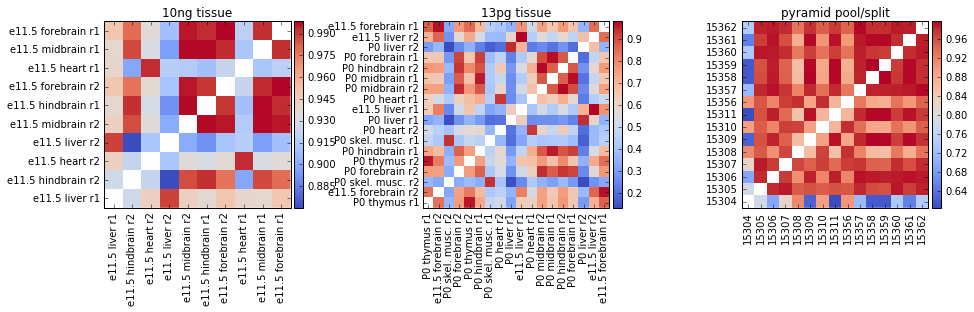

In [19]:
_ = plot_correlations(
    [tissue_10ng_scores, tissue_13pg_scores, pool_split_scores],
    [tissue_10ng_labels, tissue_13pg_labels, None],
    ['10ng tissue', '13pg tissue', 'pyramid pool/split'],
    'Naïve Pearson')

## Naive Spearman Comparison

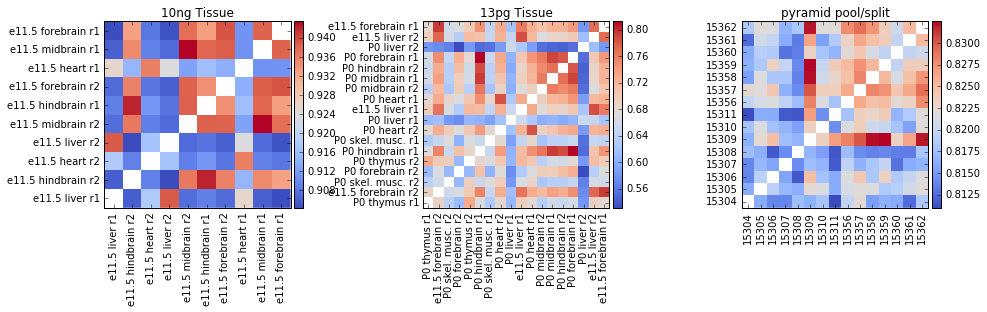

In [20]:
_ = plot_correlations(
    [tissue_10ng_scores, tissue_13pg_scores, pool_split_scores],
    [tissue_10ng_labels, tissue_13pg_labels, None],
    ['10ng Tissue', '13pg Tissue', 'pyramid pool/split'],
    'Naïve Spearman')

# Rafa's Comparisons

Rafa's scoring metrics use two filters. Drop all the zeros and then drop everything whose average log2 is < 0.

## Rafa Pearson Comparison

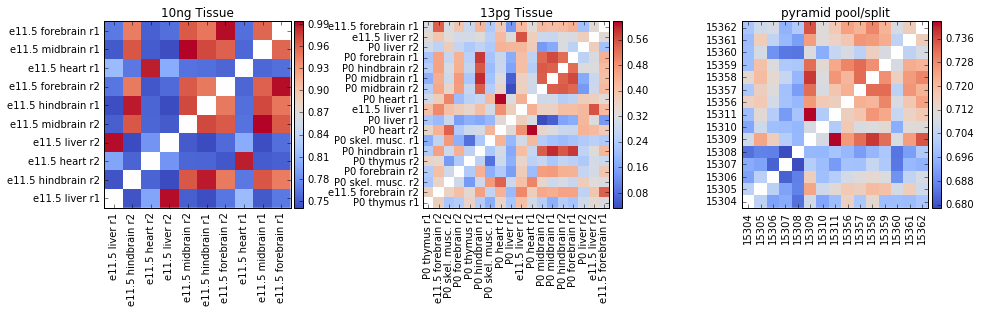

In [21]:
_ = plot_correlations(
    [tissue_10ng_scores, tissue_13pg_scores, pool_split_scores],
    [tissue_10ng_labels, tissue_13pg_labels, None],
    ['10ng Tissue', '13pg Tissue', 'pyramid pool/split'],
    'Rafa Pearson')

## Rafa Spearman Comparison

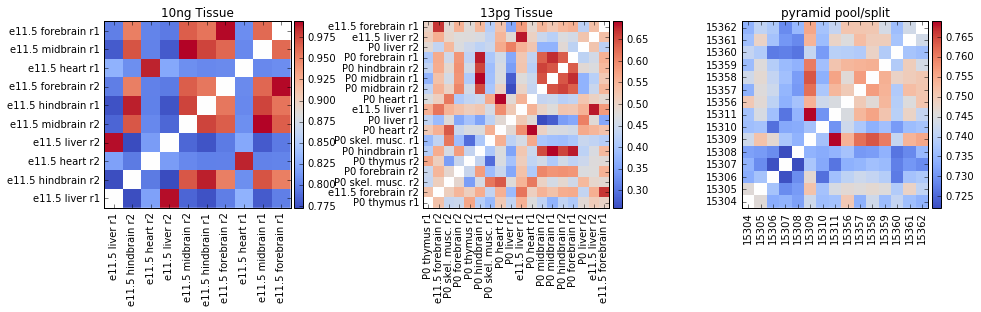

In [22]:
_ = plot_correlations(
    [tissue_10ng_scores, tissue_13pg_scores, pool_split_scores],
    [tissue_10ng_labels, tissue_13pg_labels, None],
    ['10ng Tissue', '13pg Tissue', 'pyramid pool/split'],
    'Rafa Spearman')

# Rafa MAD Comparison

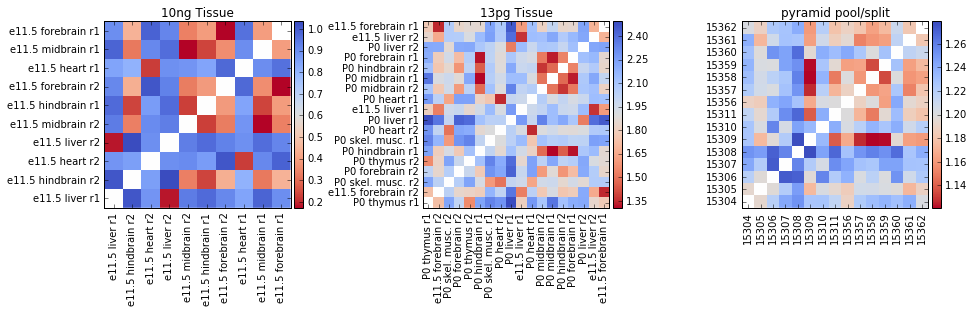

In [23]:
_ = plot_correlations(
    [tissue_10ng_scores, tissue_13pg_scores, pool_split_scores],
    [tissue_10ng_labels, tissue_13pg_labels, None],
    ['10ng Tissue', '13pg Tissue', 'pyramid pool/split'],
    'MAD')

## Rafa SD Comparison

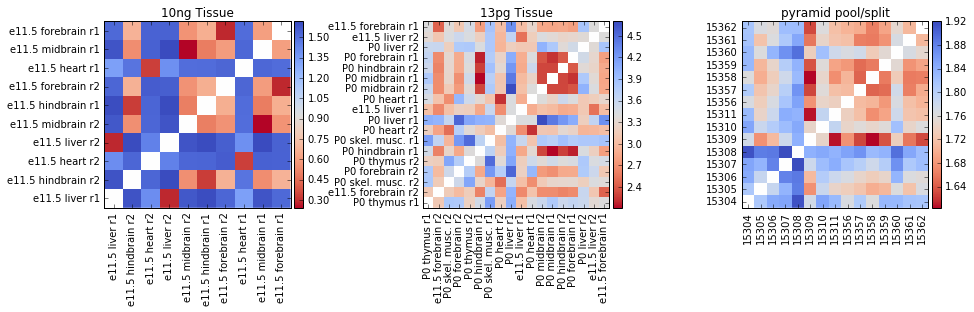

In [24]:
_ = plot_correlations(
    [tissue_10ng_scores, tissue_13pg_scores, pool_split_scores],
    [tissue_10ng_labels, tissue_13pg_labels, None],
    ['10ng Tissue', '13pg Tissue', 'pyramid pool/split'],
    'SD')

# Scores by experiment set

## All 13 pg scores

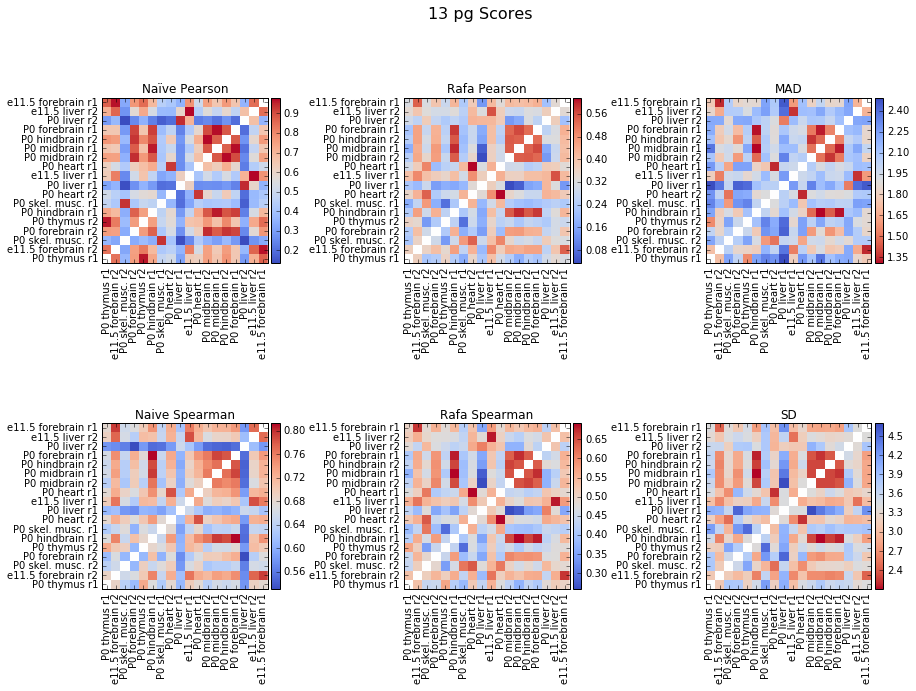

In [25]:
plot_all_scores_for_experiment_set(tissue_13pg_scores, '13 pg Scores', labels=tissue_13pg_labels)

## All 10 ng scores

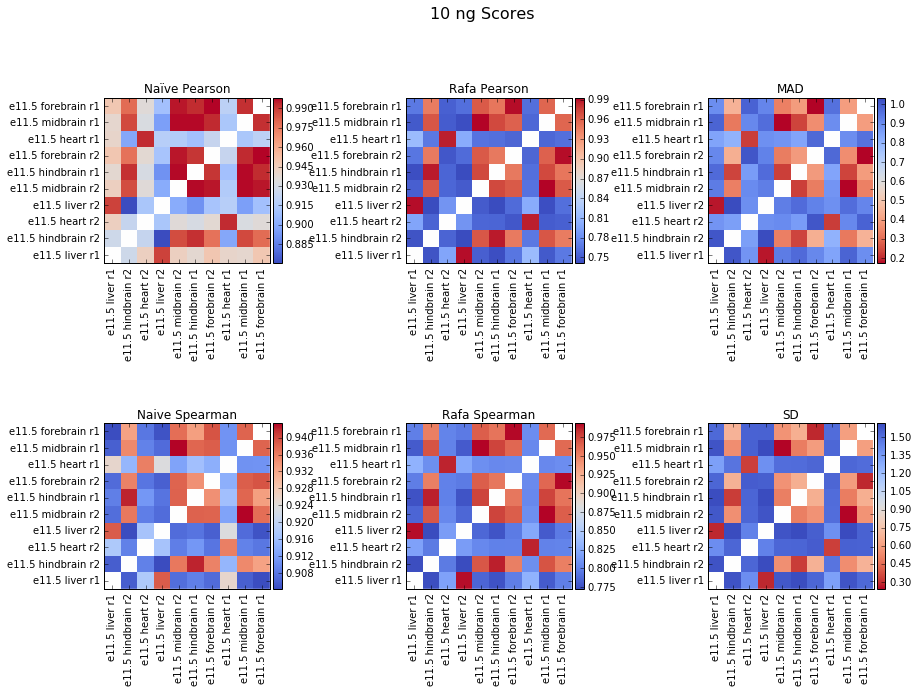

In [26]:
plot_all_scores_for_experiment_set(tissue_10ng_scores, '10 ng Scores', labels=tissue_10ng_labels)

# pool/split scores

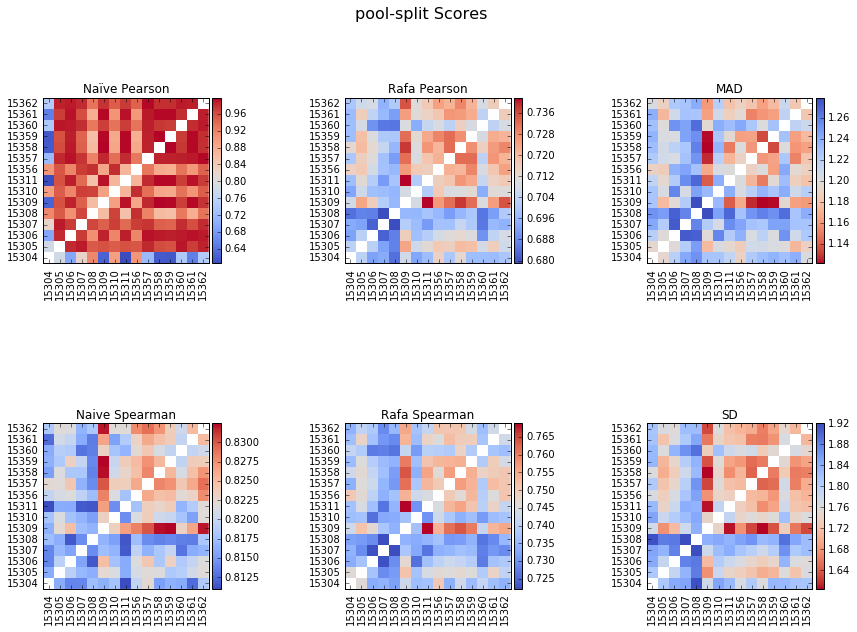

In [27]:
plot_all_scores_for_experiment_set(pool_split_scores, 'pool-split Scores')

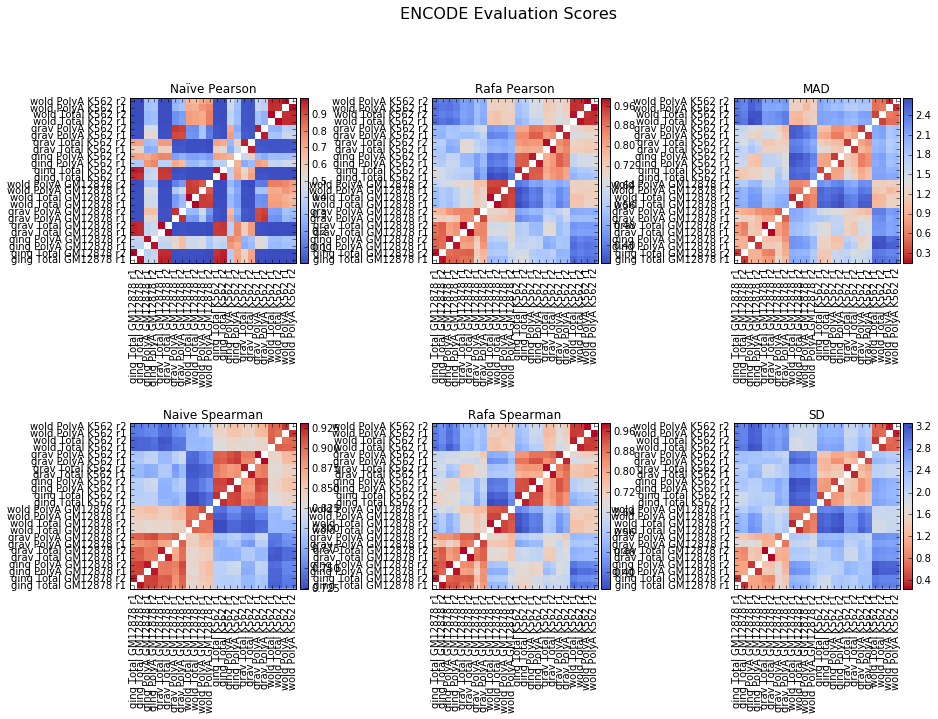

In [28]:
plot_all_scores_for_experiment_set(bulk_cell_line_scores, 'ENCODE Evaluation Scores', labels=bulk_cell_line_labels)

# Fractions Passed Filters

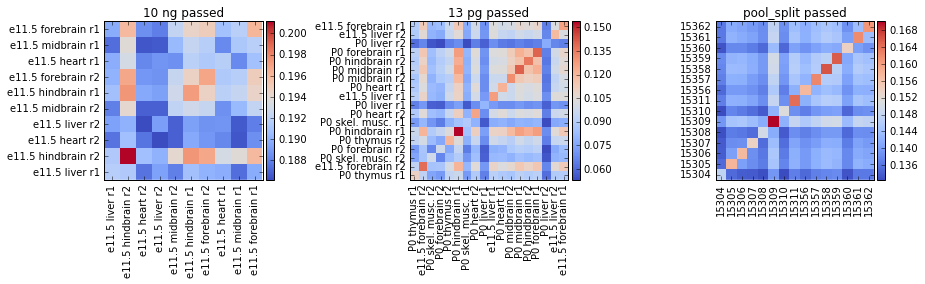

In [29]:
fig, ax = pyplot.subplots(1, 3, figsize=(14,10))
pyplot.subplots_adjust(wspace=.8, hspace=.5)
cax = heatmap(ax[0], tissue_10ng_scores['passed filter'] / tissue_10ng_scores['total rows'], 
              title='10 ng passed', labels=tissue_10ng_labels)
cax = heatmap(ax[1], tissue_13pg_scores['passed filter'] / tissue_13pg_scores['total rows'], 
              title='13 pg passed', labels=tissue_13pg_labels)
cax = heatmap(ax[2], pool_split_scores['passed filter'] / pool_split_scores['total rows'], 
              title='pool_split passed')

fig.savefig('/tmp/cell-line_v_13pg_pass_filter.png')
fig.savefig('/tmp/cell-line_v_13pg_pass_filter.svg')

# Replicate vs Replicate Scatter Plots

I was only able to find two comparable datasets between the 10ng and 13 pg datasets, e11.5 forebrain and e11.5 liver.

## Compare 10 ng e11.5 forebrain to 13 pg e11.5 forebrain

Simple log2 scatterplot with the spike ins highlighted. points with a zero wont be plotted.

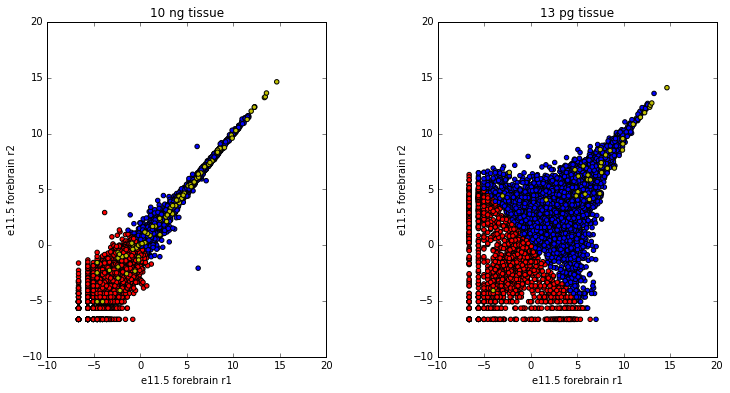

In [31]:
f = plot_replicate_comparison(
    tissue_10ng_fpkms,'ENCLB835LVO', 'ENCLB471QMM', '10 ng tissue', tissue_10ng_labels,
    tissue_13pg_fpkms, 'ENCLB917PKP', 'ENCLB026BHP', '13 pg tissue', tissue_13pg_labels)
f.savefig('/tmp/10ng_vs_13pg_forebrain.png')
f.savefig('/tmp/10ng_vs_13pg_forebrain.svg')

## Compare 10 ng e11.5 liver to 13 pg e11.5 liver

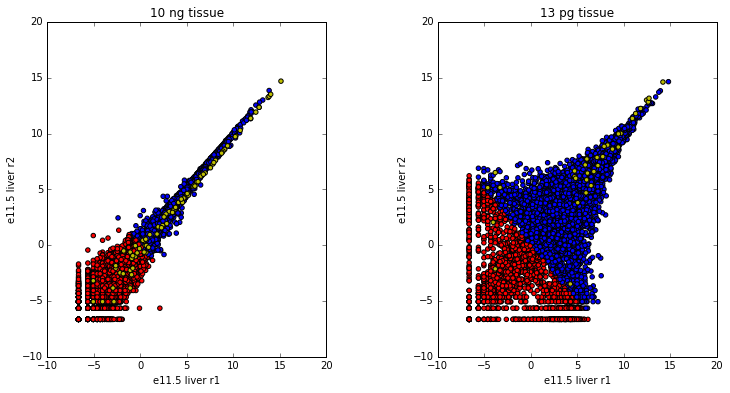

In [32]:
f = plot_replicate_comparison(
    tissue_10ng_fpkms,'ENCLB055KYV', 'ENCLB357KYA', '10 ng tissue', tissue_10ng_labels,
    tissue_13pg_fpkms, 'ENCLB449LBZ', 'ENCLB905LVV', '13 pg tissue', tissue_13pg_labels)
f.savefig('/tmp/10ng_vs_13pg_liver.png')
f.savefig('/tmp/10ng_vs_13pg_liver.svg')

## Compare 10ng forebrain to best pool/split

Best correlation I could find visually

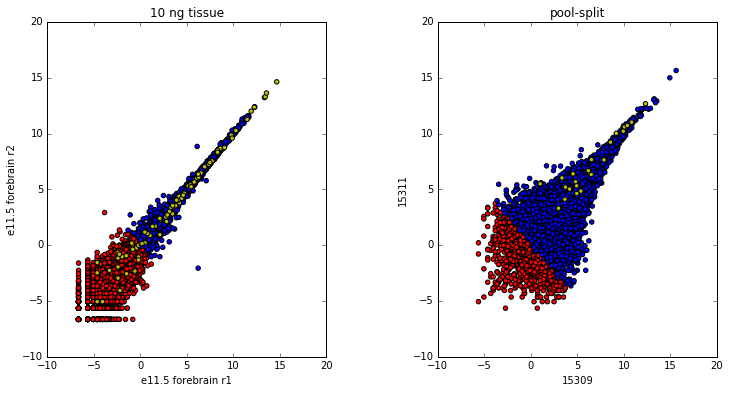

In [33]:
f = plot_replicate_comparison(
    tissue_10ng_fpkms, 'ENCLB835LVO', 'ENCLB471QMM', '10 ng tissue', tissue_10ng_labels,
    pool_split_fpkms, '15309', '15311', 'pool-split', None)
f.savefig('10ng_forebrain_vs_poolsplit-purkinje.png')
f.savefig('10ng_forebrain_vs_poolsplit-purkinje.svg')

## Compare 10 ng forebrain to worst pool/split

worst correlation I could find visually

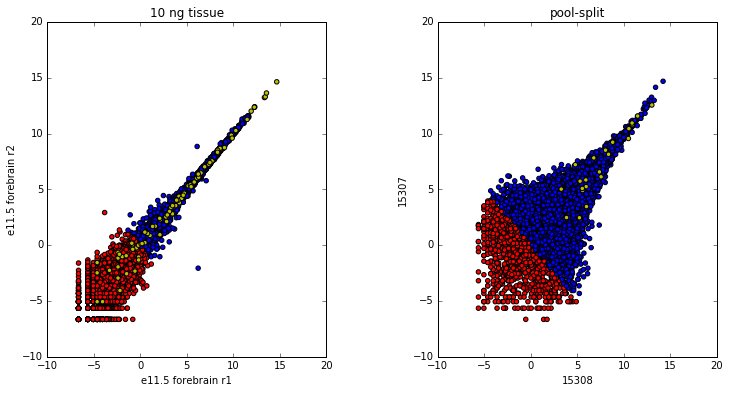

In [34]:
f = plot_replicate_comparison(
    tissue_10ng_fpkms, 'ENCLB835LVO', 'ENCLB471QMM', '10 ng tissue', tissue_10ng_labels,
    pool_split_fpkms, '15308', '15307', 'pool-split', None)

## Compare 13 pg forebrain to best pool split

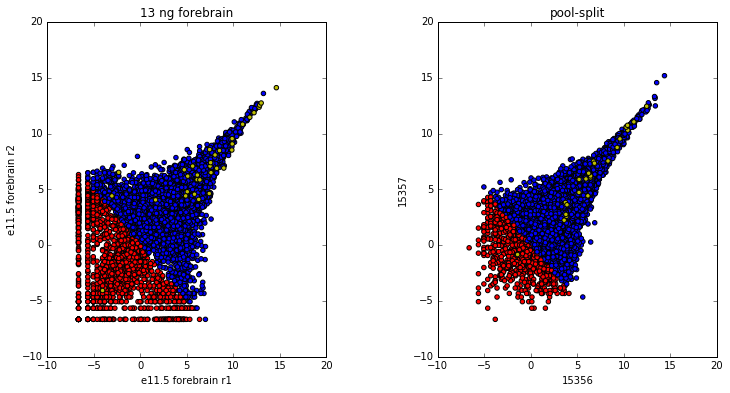

In [35]:
f = plot_replicate_comparison(
    tissue_13pg_fpkms, 'ENCLB917PKP', 'ENCLB026BHP', '13 ng forebrain', tissue_13pg_labels,
    pool_split_fpkms, '15356', '15357', 'pool-split', None)
f.savefig('13ng_forebrain_vs_poolsplit-purkinje.png')
f.savefig('13ng_forebrain_vs_poolsplit-purkinje.svg')

In [36]:
def spike_residual(fpkms, rep1, rep2):
    spikes = [ x for x in fpkms.index if x.startswith('gSpike') ]
    A = numpy.vstack([fpkms[rep1][pool_spikes], numpy.ones(len(spikes))]).T
    x, residuals, rank, s = numpy.linalg.lstsq(A, fpkms[rep2][spikes])
    print(x)
    return residuals

In [37]:
pool_spikes = [ x for x in pool_split_fpkms.index if x.startswith('gSpike') ]
A = numpy.vstack([pool_split_fpkms['15356'][pool_spikes], numpy.ones(len(pool_spikes))]).T

numpy.linalg.lstsq(A, pool_split_fpkms['15357'][pool_spikes] )
#scipy.optimize.curve_fit(lambda x: x, pool_split_fpkms['15356'][pool_spikes], pool_split_fpkms['15357'][pool_spikes])

(array([ 1.01300479,  2.68578133]),
 array([ 313584.26563759]),
 2,
 array([ 6489.30783844,     9.54817678]))

In [38]:
spike_residual(tissue_10ng_fpkms, 'ENCLB835LVO', 'ENCLB471QMM')

[ 0.97909032 -0.03372294]


array([ 2182546.16694862])

In [39]:
spike_residual(pool_split_fpkms, '15356', '15357')

[ 1.01300479  2.68578133]


array([ 313584.26563759])

In [40]:
spike_residual(bulk_cell_line_fpkms, 'ENCLB041ZZZ', 'ENCLB042ZZZ')

[  1.33465187 -35.83201046]


array([ 10691976.2854141])

# How many genes are detected

How can we tell what fraction of genes are present between the two comparable tissues?

In [41]:
def detected_genes(fpkms, rep1, rep2, Acutoff = 0):
    rep1series = fpkms[rep1]
    rep2series = fpkms[rep2]
    
    nozero = (rep1series != 0) & (rep2series != 0)
    return ((rep1series + rep2series) / 2.0)[nozero]
    
    #replz1 = numpy.log2(rep1series[nozero])
    #replz2 = numpy.log2(rep2series[nozero])
    
    # M = replz1 - replz2
    #A = (replz1 + replz2) / 2.0

    #return A[nozero] 
    #return A[A > Acutoff]   # (Rafa's extra threshold)

In [42]:
#bulk_genes = detected_genes(bulk_fpkms, 'ENCLB045ZZZ', 'ENCLB046ZZZ')
tissue_10ng_e11_forebrain_genes = detected_genes(tissue_10ng_fpkms, 'ENCLB835LVO', 'ENCLB471QMM')
tissue_10ng_e11_liver_genes = detected_genes(tissue_10ng_fpkms, 'ENCLB055KYV', 'ENCLB357KYA')

tissue_13pg_e11_forebrain_genes = detected_genes(tissue_13pg_fpkms, 'ENCLB917PKP', 'ENCLB026BHP')
tissue_13pg_e11_liver_genes = detected_genes(tissue_13pg_fpkms, 'ENCLB449LBZ', 'ENCLB905LVV')

In [43]:
def plot_detected_genes_venn(left_genes, right_genes, set_names, plot_titles):
    
    fig, ax = pyplot.subplots(1,len(left_genes), figsize=(12,8))
    for i, (left, right, names, title) in enumerate(zip(left_genes, right_genes, set_names, plot_titles)):
        left_set = set(left.index)
        right_set = set(right.index)
        ax[i].set_title(title)
        venn2([left_set, right_set], names, ax=ax[i])


## Plot 10ng vs 13pg detected gene sets

Compare genes detected between 10 ng and 13 pg forebrain and liver tissues.

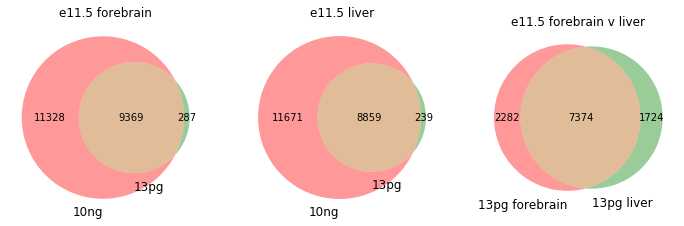

In [44]:
plot_detected_genes_venn(
    [tissue_10ng_e11_forebrain_genes, tissue_10ng_e11_liver_genes, tissue_13pg_e11_forebrain_genes], 
    [tissue_13pg_e11_forebrain_genes, tissue_13pg_e11_liver_genes, tissue_13pg_e11_liver_genes],
    [('10ng', '13pg'), ('10ng', '13pg'), ('13pg forebrain', '13pg liver')],
    ['e11.5 forebrain', 'e11.5 liver', 'e11.5 forebrain v liver'])
    

What might be in those 13 pg only sets?

In [45]:
genes_only_in_13pg_forebrain = set(tissue_13pg_e11_forebrain_genes.index).difference(set(tissue_10ng_e11_forebrain_genes.index))
genes_only_in_13pg_liver = set(tissue_13pg_e11_liver_genes.index).difference(set(tissue_10ng_e11_liver_genes.index))

In [46]:
def list_gene_names_from_filtered_set(all_genes, gene_set, gene_map, cutoff=1):
    return pandas.DataFrame(
        sorted(
            [(gene_id, gene_map[gene_id], fpkm) for gene_id, fpkm in all_genes[gene_set].items() if fpkm > cutoff],
            key=lambda x: x[2]),
        columns=['gene id', 'gene name', 'fpkm']
    )

## Genes only in 13 pg forebrain with fpkm > 1

I filtered the list of genes to those above a fpkm of 1 to avoid having too long of a list to display easily.

In [47]:
list_gene_names_from_filtered_set(tissue_13pg_e11_forebrain_genes, genes_only_in_13pg_forebrain, m4_gene_map)       

gene id   gene name    fpkm
0    ENSMUSG00000093203.1     Gm22411   1.050
1    ENSMUSG00000082926.3      Gm8172   1.095
2    ENSMUSG00000054932.3         Afp   1.245
3    ENSMUSG00000080932.3     Gm10224   1.255
4    ENSMUSG00000083813.1     Gm15502   1.275
5    ENSMUSG00000097698.1     Gm26906   1.275
6    ENSMUSG00000084333.1     Gm11599   1.280
7    ENSMUSG00000081228.1     Gm16089   1.330
8    ENSMUSG00000061330.7     Gm11361   1.540
9    ENSMUSG00000025201.7  Bloc1s2-ps   1.545
10   ENSMUSG00000049477.4      Gm8508   1.740
11   ENSMUSG00000096722.1   Hmgb1-ps9   1.775
12  ENSMUSG00000053173.11   Rpl18-ps2   1.790
13   ENSMUSG00000082128.1     Gm11824   1.830
14   ENSMUSG00000094111.1     Gm10349   1.850
15   ENSMUSG00000091655.3      Gm8741   1.870
16   ENSMUSG00000059159.6      Gm8129   2.315
17   ENSMUSG00000093023.2     Gm27826   2.680
18   ENSMUSG00000068014.5     Gm14648   2.870
19   ENSMUSG00000086691.2     Gm15432   3.055
20   ENSMUSG00000081559.3     Gm12411   3.220
21   ENSMUSG00000083670.1      Gm6829   3.720
22   ENSMUSG00000095937.1     Gm12671   4.005
23   ENSMUSG00000059461.7      Gm7331   4.090
24   ENSMUSG00000081671.1     Gm13167   4.205
25   ENSMUSG00000087367.1     Gm15491   4.285
26   ENSMUSG00000071532.6     Gm10335   4.995
27   ENSMUSG00000063543.4      Gm5616   5.000
28   ENSMUSG00000079067.5   Hmgn2-ps1   5.030
29   ENSMUSG00000066270.3     Gm10157   5.415
30   ENSMUSG00000099240.1     Gm27539   7.215
31   ENSMUSG00000093505.1     Gm20691   7.225
32   ENSMUSG00000072421.4     Gm10357   7.640
33   ENSMUSG00000078143.3     Gm17344   8.070
34   ENSMUSG00000072837.1      Mir546  11.965
35   ENSMUSG00000092329.1     Gm20388  12.990
36   ENSMUSG00000098395.1     Gm27998  16.845
37   ENSMUSG00000099136.1     Gm27608  19.315
38   ENSMUSG00000083405.1     Gm15725  21.170
39   ENSMUSG00000069622.4     Gm10273  23.255
40   ENSMUSG00000082329.1     Gm14287  25.195
41   ENSMUSG00000101330.1     Gm10193  25.780
42   ENSMUSG00000065947.3     mt-Nd4l  28.855
43   ENSMUSG00000076448.1      Mir763  31.565

## Genes only in 13 pg liver with fpkm > 1

In [48]:
list_gene_names_from_filtered_set(tissue_13pg_e11_liver_genes, genes_only_in_13pg_liver, m4_gene_map)       

gene id      gene name    fpkm
0    ENSMUSG00000081700.1        Gm14337   1.025
1    ENSMUSG00000066807.1        Gm10179   1.030
2    ENSMUSG00000081228.1        Gm16089   1.030
3    ENSMUSG00000071568.4         Gm5874   1.090
4    ENSMUSG00000062582.5      Rpl30-ps8   1.110
5    ENSMUSG00000078636.3         Gm7336   1.190
6    ENSMUSG00000080186.2        Gm14448   1.265
7    ENSMUSG00000057499.3         Gm6177   1.295
8    ENSMUSG00000090467.2         Gm4613   1.365
9    ENSMUSG00000055795.5         Gm5160   1.445
10   ENSMUSG00000082399.1        Gm14036   1.660
11   ENSMUSG00000066180.5        Gm10155   1.720
12   ENSMUSG00000070834.5        Gm13015   1.780
13   ENSMUSG00000059159.6         Gm8129   2.250
14   ENSMUSG00000081824.5       BC002163   2.445
15   ENSMUSG00000097458.1        Gm26697   2.735
16   ENSMUSG00000096976.1        Gm26882   2.910
17   ENSMUSG00000069117.3        Gm10260   4.090
18   ENSMUSG00000074547.4        Gm10712   5.190
19   ENSMUSG00000088189.1        Gm22213   5.325
20   ENSMUSG00000071532.6        Gm10335   7.020
21   ENSMUSG00000064880.1        Gm24201   7.145
22   ENSMUSG00000083708.1        Gm13123   7.350
23   ENSMUSG00000068014.5        Gm14648   7.450
24   ENSMUSG00000072837.1         Mir546   8.135
25   ENSMUSG00000094392.1         Gm3788   8.630
26   ENSMUSG00000063556.5        Gm10132   8.840
27  ENSMUSG00000047807.10  9330154K18Rik  10.550
28   ENSMUSG00000065124.1        Snora65  33.150

## Sliding window reporting fraction of genes detected by fpkm

I was trying to think of how to guess what the limits of detection are, so this is an attempt to compute
the fraction of NaNs (triggered by having a zero fpkm in either column) on the arrays sorted by the max
expression between the two replicates.

The x tick labels are a little tricky. For all but the last ones they're the expression level for the gene at that position. e.g. gene 5000 might have an expression level of .5. The last tickmark is the maximum value in the 
expression value list.

In [49]:
def fraction_not_nan(experiment_list, experiment_names):
    genes = pandas.DataFrame(experiment_list, index=experiment_names).T
    sorted_genes = sorted(zip(genes.fillna(0).values, genes.index), key=lambda x: max(x[0]))
    gene_ids = [row[1] for row in sorted_genes]

    f, ax = pyplot.subplots(1,1, figsize=(12,8))
    for exp, name in zip(experiment_list, experiment_names):
        windows = pandas.rolling_count(exp[gene_ids], window=100)/100.0
        ax.plot(windows.values, label=name)
    ax.set_ylim((0,1.10))
    ax.set_ylabel('fraction of != 0 in either replicate')

    ax.set_xlabel('genes sorted by maximum average fpkm expression')
    expression_levels = [max(row[0]) for row in sorted_genes]
    xticklabels = []
    myticks = numpy.arange(0, ax.get_xticks()[-1], 2500)
    for xtick in myticks:
        xtick = int(xtick)
        xticklabels.append(expression_levels[xtick] if xtick < len(expression_levels) else expression_levels[-1])
    ax.set_xticks(myticks)
    ax.set_xticklabels(xticklabels)
    ax.legend(loc='best')
    
    return f

## e11.5 forebrain fraction non-null observations

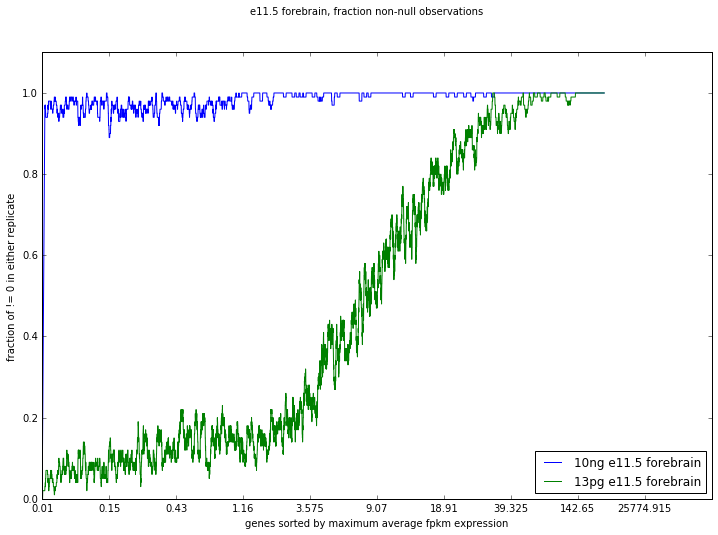

In [50]:
f = fraction_not_nan([tissue_10ng_e11_forebrain_genes, tissue_13pg_e11_forebrain_genes], 
                     ['10ng e11.5 forebrain', '13pg e11.5 forebrain'])
f.suptitle('e11.5 forebrain, fraction non-null observations')
f.savefig('/tmp/fraction_e11_forebrain_observed.png')
f.savefig('/tmp/fraction_e11_forebrain_observed.svg')

## e11.5 liver fraction non-null observations

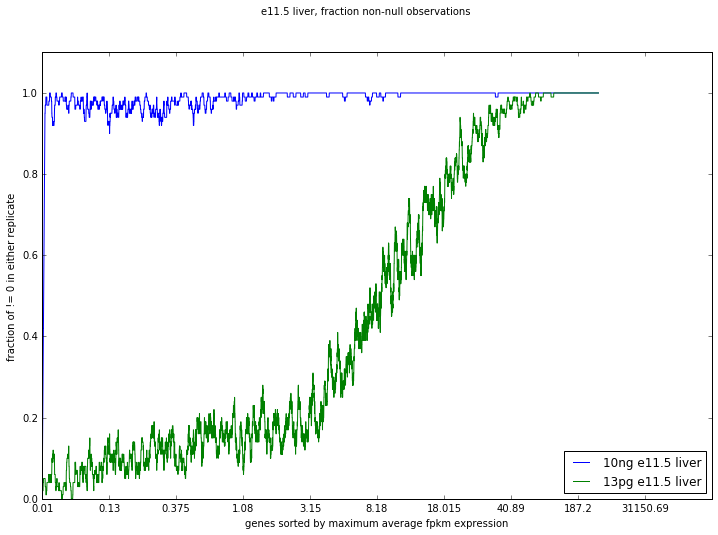

In [51]:
f = fraction_not_nan([tissue_10ng_e11_liver_genes, tissue_13pg_e11_liver_genes], 
                     ['10ng e11.5 liver', '13pg e11.5 liver'])
f.suptitle('e11.5 liver, fraction non-null observations')
f.savefig('/tmp/fraction_e11_liver_observed.png')
f.savefig('/tmp/fraction_e11_liver_observed.svg')

# Sweep over Acutoff values

How does the correlation change as we increase Acutoff

In [52]:
def stable(fpkms, rep1_name, rep2_name, labels):
    rep1 = fpkms[rep1_name]
    rep2 = fpkms[rep2_name]
    
    eitherzero = (rep1 == 0) | (rep2 == 0)
    replz1 = numpy.log2(rep1[eitherzero != True])
    replz2 = numpy.log2(rep2[eitherzero != True])
    
    M = replz1 - replz2
    A = (replz1 + replz2) / 2.0

    print('{} v {}'.format(labels.get(rep1_name, rep1_name), labels.get(rep2_name, rep2_name)))
    print('Total genes:', len(rep1.index))
    print('Detectable (both replicates non-zero):', len(replz1.index))
    
    results = []
    cutoffs = numpy.arange(11, dtype=int)
    for Acutoff in cutoffs:
        passed_filter = replz1[A > Acutoff]
        row = {}
        row['Acutoff'] = Acutoff
        row['pass cutoff'] = len(passed_filter)
        row['Pearson'] = scipy.stats.pearsonr(replz1[A > Acutoff], replz2[A > Acutoff])[0]
        row['Spearman'] = scipy.stats.spearmanr(replz1[A > Acutoff], replz2[A > Acutoff])[0]
        row['mad'] = numpy.round(numpy.median(numpy.abs(M)[A > Acutoff]) * 1.4826, 3)
        row['sd'] = numpy.round(numpy.sqrt(numpy.mean(M[A > Acutoff] ** 2)), 3)
        row['fraction spikes'] = len([ x for x in passed_filter.index if x.startswith('gSpike') ]) / len(passed_filter)
        results.append(row)
    return pandas.DataFrame(results, index=cutoffs)
        


## 13 pg Acutoff sweep

### 13pg e11.5 liver correlation Acutoff sweep

In [53]:
acutoff_13pg_e11_liver = stable(tissue_13pg_fpkms, 'ENCLB449LBZ', 'ENCLB905LVV', labels=tissue_13pg_labels)
acutoff_13pg_e11_liver

e11.5 liver r1 v e11.5 liver r2
Total genes: 69690
Detectable (both replicates non-zero): 9098


Acutoff   Pearson  Spearman  fraction spikes    mad  pass cutoff     sd
0         0  0.557837  0.683440         0.004284  1.363         7237  2.535
1         1  0.645828  0.699518         0.004217  1.270         6640  1.977
2         2  0.703040  0.701289         0.004436  1.181         6086  1.632
3         3  0.738588  0.688262         0.005087  1.071         5308  1.377
4         4  0.771877  0.674803         0.006240  0.958         4327  1.166
5         5  0.798249  0.672866         0.008500  0.871         3059  0.999
6         6  0.841773  0.706509         0.010753  0.698         1860  0.811
7         7  0.883959  0.777721         0.015564  0.570         1028  0.642
8         8  0.921106  0.851711         0.024164  0.420          538  0.472
9         9  0.939338  0.874983         0.035587  0.363          281  0.371
10       10  0.947811  0.867774         0.053846  0.313          130  0.319

### 13pg e11.5 forebrain correlation Acutoff sweep

In [54]:
acutoff_13pg_e11_forebrain = stable(tissue_13pg_fpkms, 'ENCLB917PKP', 'ENCLB026BHP', labels=tissue_13pg_labels)
acutoff_13pg_e11_forebrain

e11.5 forebrain r1 v e11.5 forebrain r2
Total genes: 69690
Detectable (both replicates non-zero): 9656


Acutoff   Pearson  Spearman  fraction spikes    mad  pass cutoff     sd
0         0  0.542825  0.668632         0.004057  1.344         7888  2.453
1         1  0.613162  0.678433         0.004226  1.257         7335  1.996
2         2  0.689709  0.684020         0.004634  1.160         6689  1.582
3         3  0.724843  0.668487         0.004955  1.077         5853  1.339
4         4  0.755383  0.647261         0.006161  0.974         4707  1.139
5         5  0.781754  0.654375         0.008517  0.829         3170  0.979
6         6  0.833791  0.706287         0.011963  0.652         1839  0.775
7         7  0.878839  0.765261         0.018182  0.515          990  0.605
8         8  0.916934  0.832327         0.026585  0.398          489  0.454
9         9  0.929421  0.830107         0.043478  0.356          230  0.373
10       10  0.955542  0.899733         0.073684  0.259           95  0.274

### 13pg P0 heart correlation Acutoff sweep

In [55]:
acutoff_13pg_p0_forebrain = stable(tissue_13pg_fpkms, 'ENCLB652HKH', 'ENCLB348BMH', labels=tissue_13pg_labels)
acutoff_13pg_p0_forebrain

P0 heart r1 v P0 heart r2
Total genes: 69690
Detectable (both replicates non-zero): 9209


Acutoff   Pearson  Spearman  fraction spikes    mad  pass cutoff     sd
0         0  0.616631  0.691520         0.003840  1.343         7291  2.225
1         1  0.697177  0.700241         0.004169  1.247         6716  1.755
2         2  0.739077  0.689392         0.004443  1.166         6077  1.478
3         3  0.775030  0.671793         0.004993  1.073         5207  1.253
4         4  0.796384  0.659135         0.006323  1.002         3954  1.110
5         5  0.829451  0.695983         0.008310  0.869         2527  0.956
6         6  0.865667  0.739689         0.011604  0.774         1465  0.798
7         7  0.876718  0.774469         0.014851  0.724          808  0.716
8         8  0.883917  0.791867         0.018391  0.658          435  0.642
9         9  0.870352  0.788517         0.029787  0.599          235  0.622
10       10  0.851616  0.794657         0.051724  0.535          116  0.606

## 13pg Mismatched replicate correlation Acutoff sweep

In [56]:
acutoff_13pg_heart_v_forebrain = stable(tissue_13pg_fpkms, 'ENCLB652HKH', 'ENCLB026BHP', labels=tissue_13pg_labels)
acutoff_13pg_heart_v_forebrain

P0 heart r1 v e11.5 forebrain r2
Total genes: 69690
Detectable (both replicates non-zero): 9043


Acutoff   Pearson  Spearman  fraction spikes    mad  pass cutoff     sd
0         0  0.374546  0.506341         0.004168  2.033         7198  3.085
1         1  0.447431  0.522676         0.004537  1.915         6612  2.540
2         2  0.501805  0.520326         0.005021  1.783         5975  2.153
3         3  0.533030  0.490147         0.005838  1.671         5139  1.892
4         4  0.532620  0.436217         0.006988  1.595         4007  1.742
5         5  0.495570  0.389922         0.010097  1.572         2575  1.694
6         6  0.481838  0.379808         0.013889  1.561         1440  1.612
7         7  0.425082  0.349540         0.019455  1.543          771  1.574
8         8  0.323645  0.233962         0.028133  1.476          391  1.543
9         9  0.216771  0.018223         0.038835  1.481          206  1.526
10       10  0.119137  0.036746         0.092105  1.853           76  1.730

Using the fraction data present plot and the earlier scatter plots I estimated that somewhere between an Acutoff of 5 to 6 would give a reasonable correlation. (An average of 32 - 64 fpkm).

### function to plot interesting scores for Acutoff sweep

In [57]:
def plot_scores_by_acutoff(scores, names):
    fig, ax = pyplot.subplots(2, 2, figsize=(12, 12))

    titles = [['Genes passed cutoff', 'MAD'],
              ['Spearman', 'Pearson']]
    attributes = [['pass cutoff', 'mad'],
                  ['Spearman', 'Pearson']]

    for i in range(2):
        for j in range(2):
            for acut, name in zip(scores, names):
                ax[i][j].plot(acut[attributes[i][j]], label=name)
            ax[i][j].set_title(titles[i][j])
            ax[i][j].legend(loc=0)
            ax[i][j].set_xlabel('Acutoff')
    return fig

## Plot 13 pg scores by Acutoff 

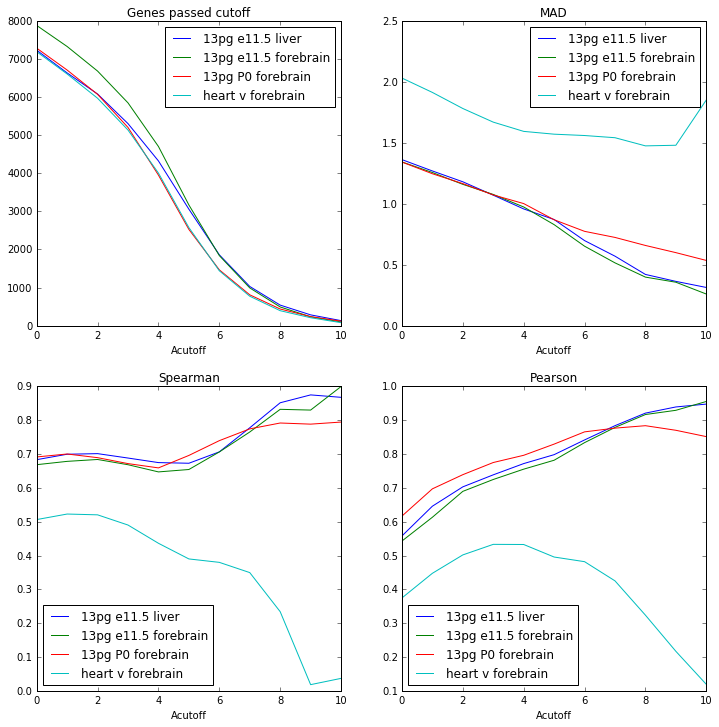

In [58]:
fig = plot_scores_by_acutoff(
    [acutoff_13pg_e11_liver, acutoff_13pg_e11_forebrain, acutoff_13pg_p0_forebrain, acutoff_13pg_heart_v_forebrain],
    ['13pg e11.5 liver', '13pg e11.5 forebrain', '13pg P0 forebrain', 'heart v forebrain'])


## 10 ng Acutoff

### 10 ng e11.5 liver

In [59]:
acutoff_10ng_e11_liver = stable(tissue_10ng_fpkms, 'ENCLB055KYV', 'ENCLB357KYA', labels=tissue_10ng_labels)
acutoff_10ng_e11_liver

e11.5 liver r1 v e11.5 liver r2
Total genes: 69690
Detectable (both replicates non-zero): 20530


Acutoff   Pearson  Spearman  fraction spikes    mad  pass cutoff     sd
0         0  0.991193  0.992050         0.004622  0.188        13198  0.287
1         1  0.992770  0.991933         0.004648  0.174        11619  0.233
2         2  0.993465  0.990958         0.005187  0.159         9832  0.198
3         3  0.994135  0.989666         0.006019  0.149         7808  0.171
4         4  0.994878  0.988546         0.007303  0.139         5477  0.148
5         5  0.994742  0.986087         0.009066  0.131         3309  0.142
6         6  0.994849  0.987241         0.013873  0.122         1730  0.135
7         7  0.993843  0.985695         0.023283  0.118          859  0.144
8         8  0.991128  0.981699         0.040506  0.125          395  0.168
9         9  0.988099  0.965409         0.056122  0.145          196  0.194
10       10  0.985733  0.946452         0.109756  0.145           82  0.219

### 10 ng e11.5 forebrain

In [60]:
acutoff_10ng_e11_forebrain = stable(tissue_10ng_fpkms, 'ENCLB471QMM', 'ENCLB835LVO', labels=tissue_10ng_labels)
acutoff_10ng_e11_forebrain

e11.5 forebrain r2 v e11.5 forebrain r1
Total genes: 69690
Detectable (both replicates non-zero): 20697


Acutoff   Pearson  Spearman  fraction spikes    mad  pass cutoff     sd
0         0  0.990435  0.992246         0.004343  0.175        13586  0.286
1         1  0.991541  0.991910         0.004426  0.160        11975  0.237
2         2  0.991870  0.990948         0.004840  0.149        10330  0.207
3         3  0.993909  0.989879         0.005456  0.137         8248  0.160
4         4  0.994209  0.987574         0.006593  0.127         5764  0.141
5         5  0.994116  0.984447         0.008863  0.118         3385  0.133
6         6  0.993098  0.982212         0.014898  0.112         1611  0.137
7         7  0.991145  0.981515         0.025166  0.108          755  0.148
8         8  0.994473  0.982281         0.049536  0.112          323  0.115
9         9  0.994374  0.987556         0.082645  0.124          121  0.115
10       10  0.991022  0.980382         0.142857  0.134           56  0.129

### 10ng e11.5 liver v forebrain

In [61]:
acutoff_10ng_e11_liver_v_forebrain = stable(tissue_10ng_fpkms, 'ENCLB055KYV', 'ENCLB835LVO', labels=tissue_10ng_labels)
acutoff_10ng_e11_liver_v_forebrain

e11.5 liver r1 v e11.5 forebrain r1
Total genes: 69690
Detectable (both replicates non-zero): 19915


Acutoff   Pearson  Spearman  fraction spikes    mad  pass cutoff     sd
0         0  0.767795  0.800007         0.004612  0.900        13225  1.524
1         1  0.766189  0.781974         0.004652  0.836        11608  1.362
2         2  0.773459  0.763396         0.005162  0.781         9880  1.198
3         3  0.780092  0.741032         0.005900  0.724         7797  1.059
4         4  0.780732  0.706400         0.007423  0.686         5389  0.960
5         5  0.790341  0.687371         0.009407  0.672         3189  0.885
6         6  0.795430  0.699116         0.015893  0.688         1573  0.849
7         7  0.790809  0.690032         0.026455  0.725          756  0.846
8         8  0.750215  0.654782         0.046784  0.912          342  0.934
9         9  0.782226  0.616872         0.073826  0.946          149  0.888
10       10  0.784264  0.650338         0.166667  0.725           60  0.859

### Plot 10 ng scores by Acutoff

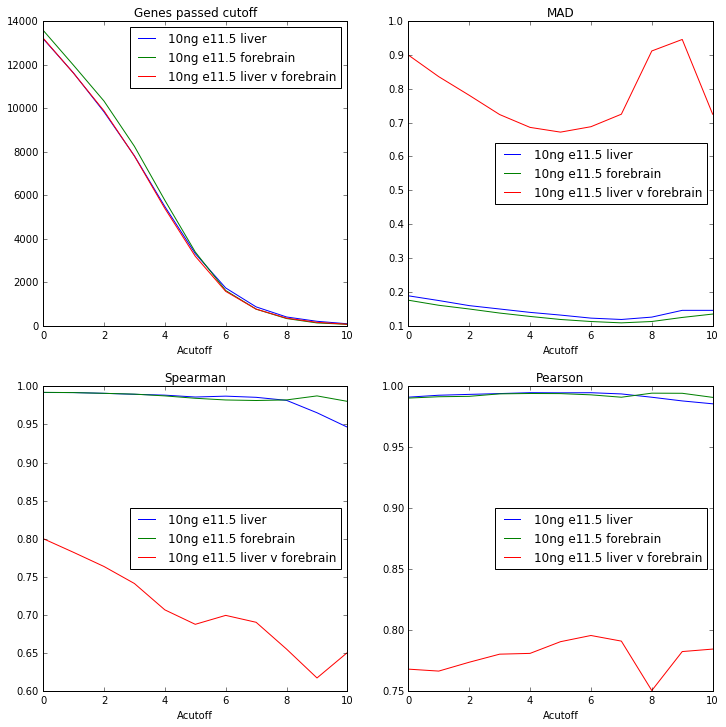

In [62]:
fig = plot_scores_by_acutoff(
    [acutoff_10ng_e11_liver, acutoff_10ng_e11_forebrain, acutoff_10ng_e11_liver_v_forebrain],
    ['10ng e11.5 liver', '10ng e11.5 forebrain', '10ng e11.5 liver v forebrain'])

## Compare 13 pg and 10 ng tissues

The seperation between the mismatched replicate and the true replicates seems much wider in the 10ng case than the 13pg. I think it'd be useful to try and compare them on the same scale.

One thing to note. is the 10 ng mismatched (gold) sample scores the same as the 13 pg matched for most Acutoffs.

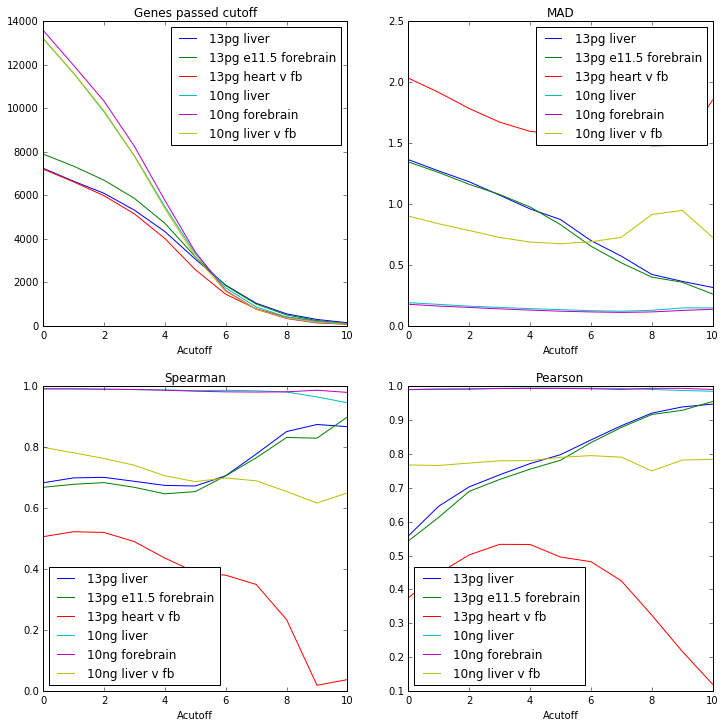

In [63]:
fig = plot_scores_by_acutoff(
    [acutoff_13pg_e11_liver, acutoff_13pg_e11_forebrain, acutoff_13pg_heart_v_forebrain, 
     acutoff_10ng_e11_liver, acutoff_10ng_e11_forebrain, acutoff_10ng_e11_liver_v_forebrain],
    ['13pg liver', '13pg e11.5 forebrain', '13pg heart v fb',
     '10ng liver', '10ng forebrain', '10ng liver v fb'])


# Filtered correlation score heatmaps

In [64]:
def plot_filtered_scores_for_experiment_set(scores, title, labels=None, vmin=None, vmax=None):
    fig, ax = pyplot.subplots(2, 3, figsize=(14, 10))
    fig.suptitle(title, fontsize=16)
    pyplot.subplots_adjust(wspace=.7, hspace=.4)

    cax = heatmap(ax[0][0], scores['Rafa Pearson'][scores['Rafa Pearson'] < 1.0], 
                  title='Rafa Pearson', labels=labels, vmin=vmin, vmax=vmax)
    cax = heatmap(ax[1][0], scores['Rafa Spearman'][scores['Rafa Spearman'] < 1.0], 
                  title='Rafa Spearman', labels=labels, vmin=vmin, vmax=vmax)

    cax = heatmap(ax[0][1], scores['MAD'][scores['MAD'] > 0], 
                  title='MAD', labels=labels, vmin=vmin, vmax=vmax, cmap="coolwarm_r")
    cax = heatmap(ax[1][1], scores['SD'][scores['SD'] > 0], 
                  title='SD', labels=labels, vmin=vmin, vmax=vmax, cmap="coolwarm_r")
    
    cax = heatmap(ax[0][2], scores['passed filter'] / scores['total rows'],
              title='Fraction passed filter', labels=labels )

    ax[1][2].set_visible(False)
    return fig

In [65]:
def plot_all_filtered_correlations_for_cutoff(fpkms, Acutoff, experiment_name, labels):
    scores = compute_all_vs_all_scores(fpkms, Acutoff=Acutoff)
    fig = plot_filtered_scores_for_experiment_set(
        scores, 'Acutoff>{} {} Scores'.format(Acutoff, experiment_name), labels=labels)
    figname = 'Acutoff_gt_{}_for_{}_scores'.format(Acutoff, experiment_name.lower())
    figname = figname.replace(' ', '-')
    fig.savefig('/tmp/'+figname+'.png')
    fig.savefig('/tmp/'+figname+'.svg')

In [66]:
def plot_score_by_cutoff(fpkms, labels):
    Acutoffs = [5,6,7,8]
    score_names = ['Rafa Pearson', 'Rafa Spearman', 'MAD', 'SD', 'passed filter']
    scores = []
    for Acutoff in Acutoffs:
        scores.append(compute_all_vs_all_scores(fpkms, Acutoff))
        
    fig, ax = pyplot.subplots(len(score_names), len(scores), 
                              figsize=(6 * len(scores), 4 * len(score_names)))
    for row, score_name in enumerate(score_names):
        for col, (Acutoff, score) in enumerate(zip(Acutoffs, scores)):
            if score_name == 'passed filter':
                corr = score['passed filter'] / score['total rows']
                colormap='coolwarm'
                vmin = None
                vmax = None
            elif score_name in ('MAD', 'SD'):
                corr = score[score_name][score[score_name] > 0]
                colormap='coolwarm_r'
                vmin = .5
                vmax = 2
            else:
                corr = score[score_name][score[score_name] < 1]
                colormap='coolwarm'
                vmin = .3
                vmax = .9
            
            cax = heatmap(ax[row][col], corr, labels=labels, cmap=colormap, vmin=vmin, vmax=vmax)
            
            if col == 0:
                ax[row][col].set_ylabel(score_name)
            elif col != 0:
                ax[row][col].set_yticklabels([])
                
            if row == 0:
                ax[row][col].set_title('Acutoff > {}'.format(Acutoff))
            if row != len(score_names) - 1:
                ax[row][col].set_xticklabels([])
            else:
                ax[row][col].set_xlabel('Acutoff > {}'.format(Acutoff))

    return fig, ax

## Plot score by cutoff

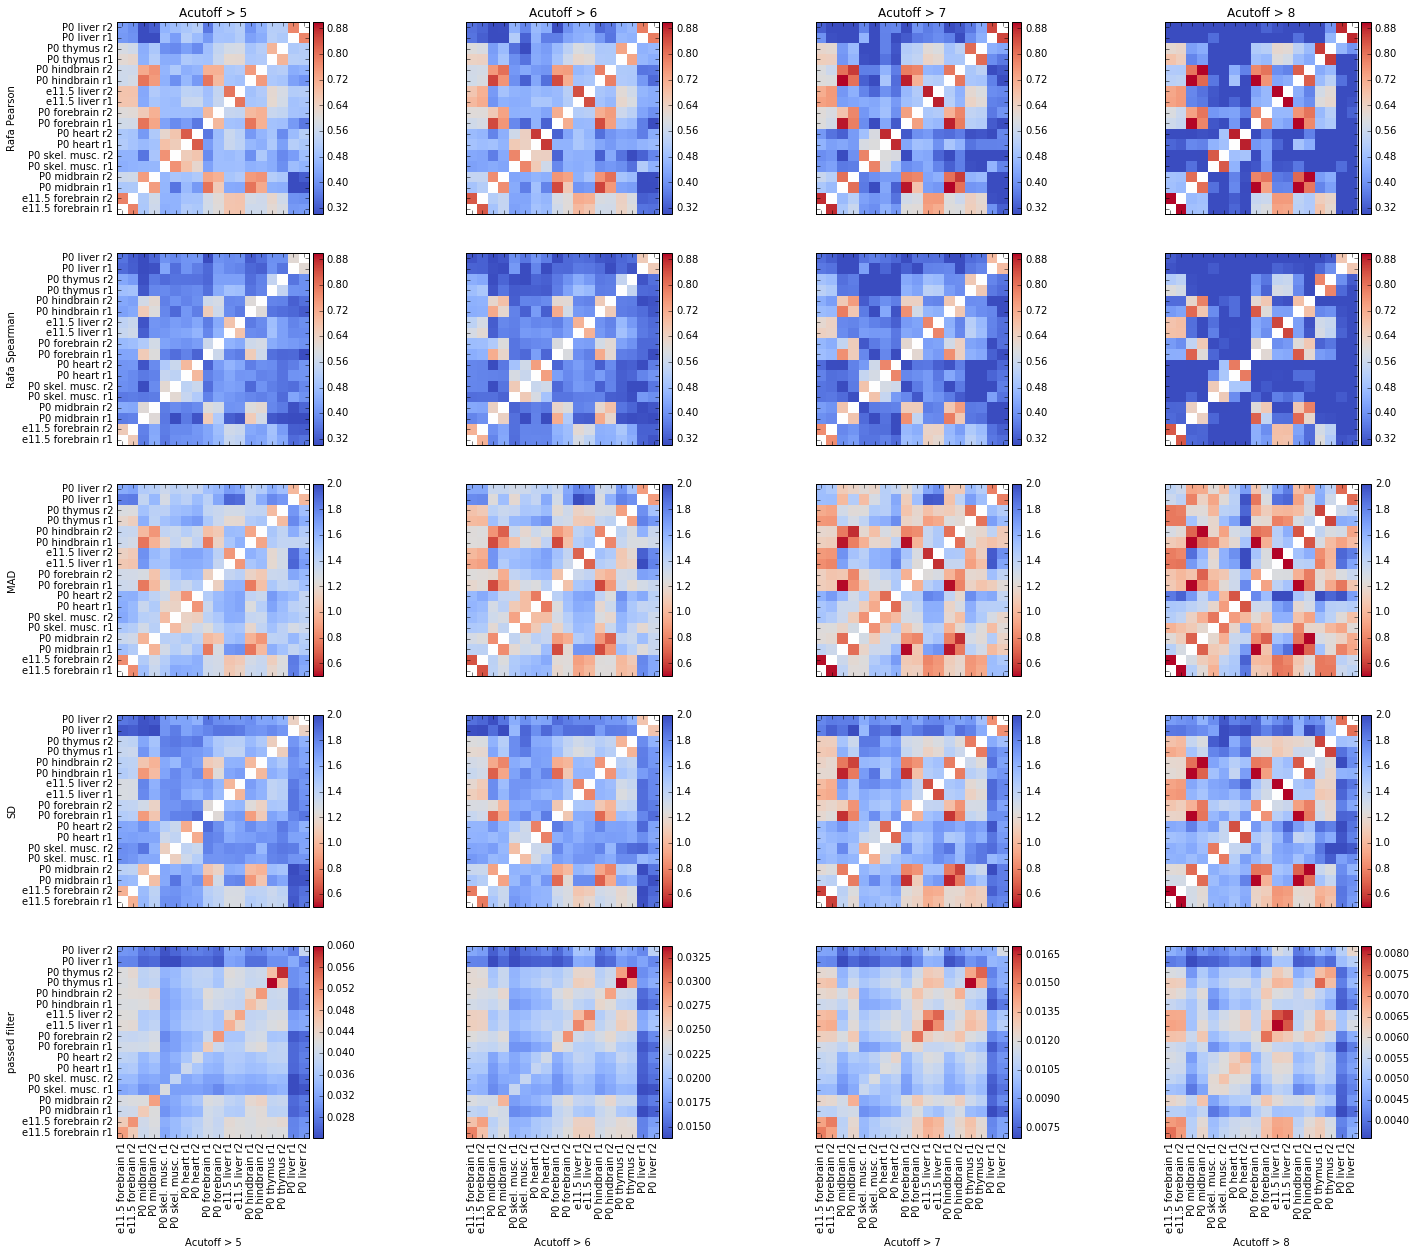

In [67]:
 fig, ax = plot_score_by_cutoff(tissue_13pg_fpkms, tissue_13pg_labels)

In [68]:
fig.savefig('/tmp/score_by_acutoff.png')
fig.savefig('/tmp/score_by_acutoff.svg')

## 13 pg correlation scores for Acutoff > 5

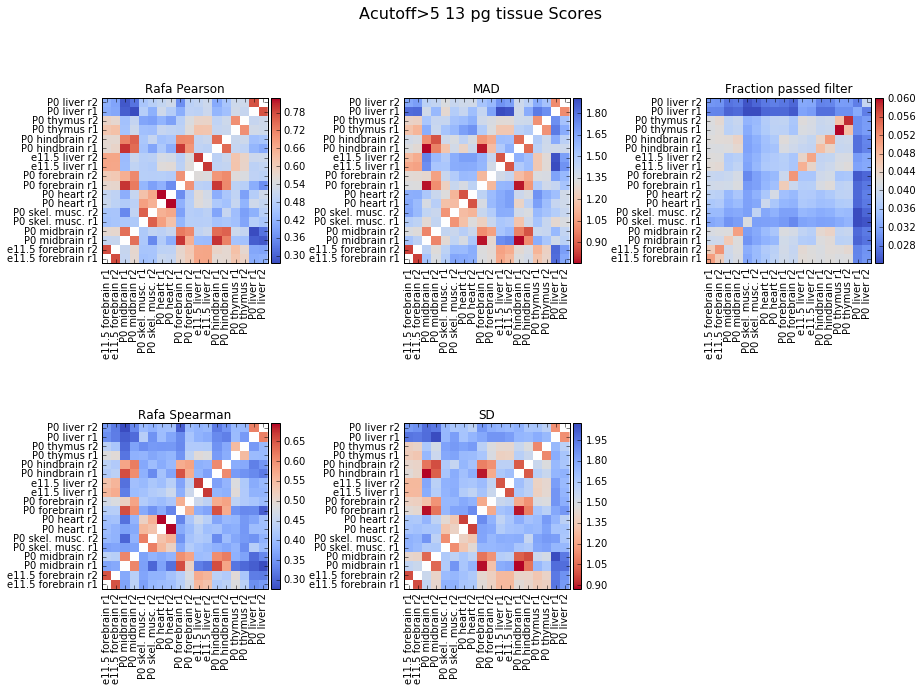

In [69]:
plot_all_filtered_correlations_for_cutoff(tissue_13pg_fpkms, 5, '13 pg tissue', labels=tissue_13pg_labels)

## 13 pg correlation scores for Acutoff > 6

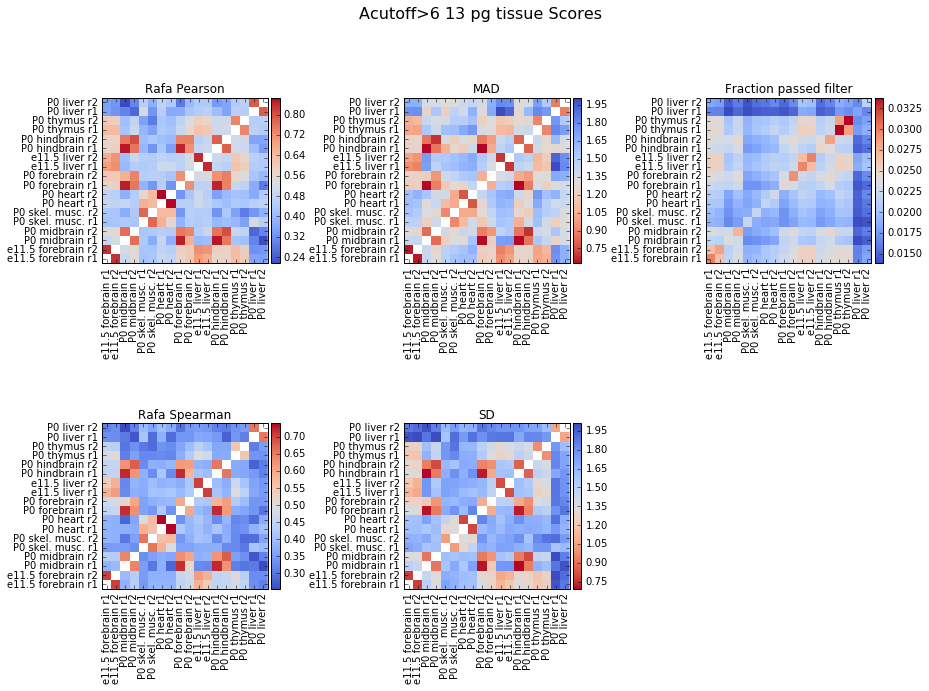

In [70]:
plot_all_filtered_correlations_for_cutoff(tissue_13pg_fpkms, 6, '13 pg tissue', labels=tissue_13pg_labels)

## 13 pg correlation scores for Acutoff > 7

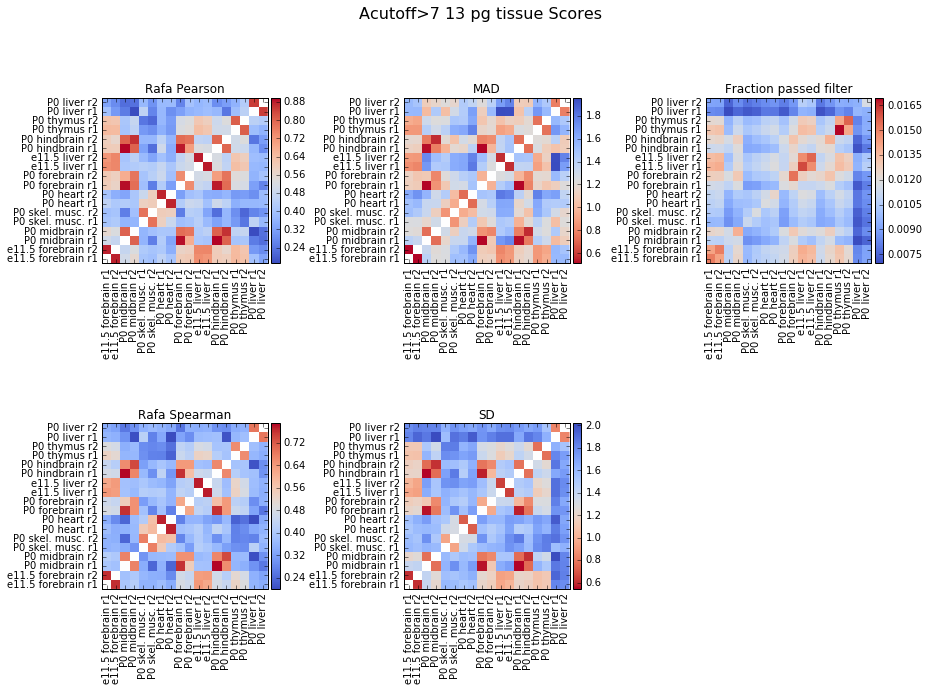

In [71]:
plot_all_filtered_correlations_for_cutoff(tissue_13pg_fpkms, 7, '13 pg tissue', labels=tissue_13pg_labels)

## 13 pg correlation scores for Acutoff > 8

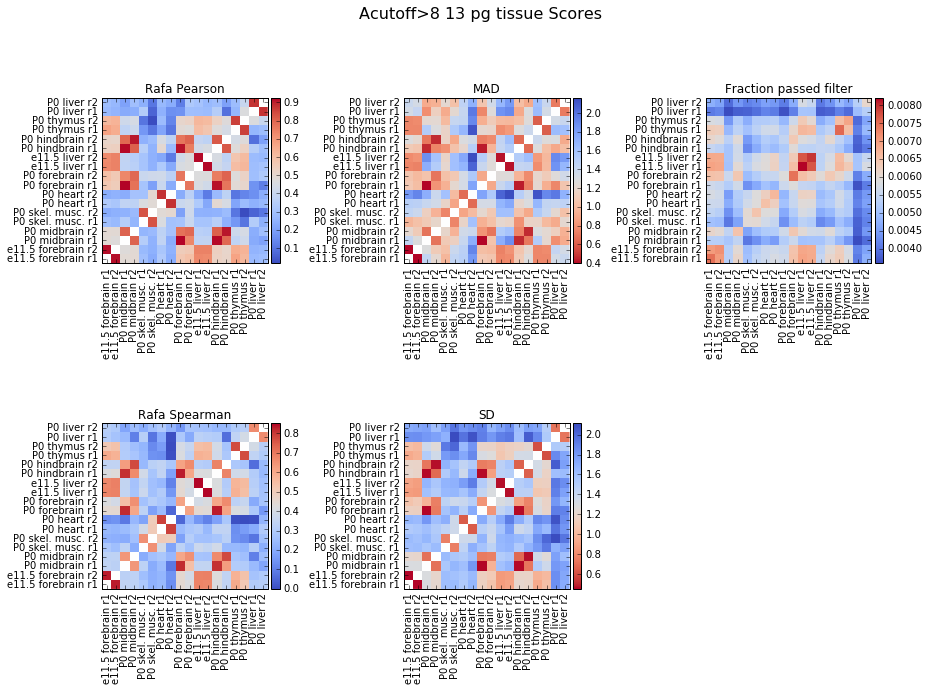

In [72]:
plot_all_filtered_correlations_for_cutoff(tissue_13pg_fpkms, 8, '13 pg tissue', labels=tissue_13pg_labels)

## Scatter plots of matched replicates filtered by Acutoff > 6

<a href="#Compare-10-ng-e11.5-forebrain-to-13-pg-e11.5-forebrain">Link to e11.5 forebrain Acutoff > 0 scatter plot</a>

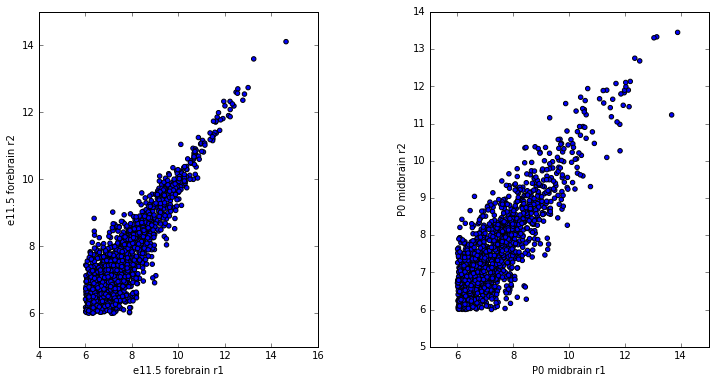

In [73]:
f = plot_replicate_comparison(
    tissue_13pg_fpkms[tissue_13pg_fpkms > 2**6], 'ENCLB917PKP', 'ENCLB026BHP', '', tissue_13pg_labels,
    tissue_13pg_fpkms[tissue_13pg_fpkms > 2**6], 'ENCLB719BQO', 'ENCLB669AEL', '', tissue_13pg_labels)

<a href="#Compare-10-ng-e11.5-liver-to-13-pg-e11.5-liver">Link to e11.5 liver Acutoff > 0 scatter plot</a>

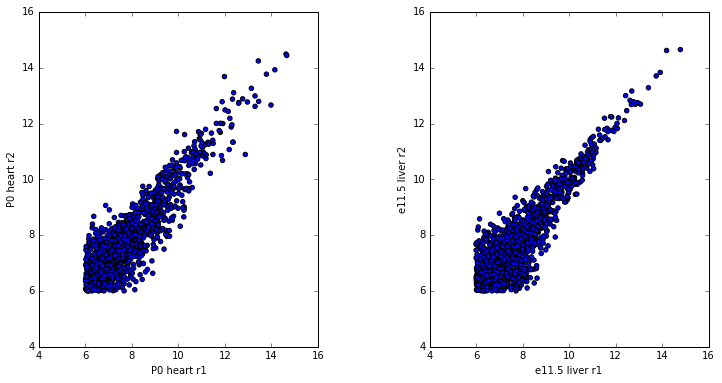

In [74]:
f = plot_replicate_comparison(
    tissue_13pg_fpkms[tissue_13pg_fpkms > 2**6], 'ENCLB652HKH', 'ENCLB348BMH', '', tissue_13pg_labels,
    tissue_13pg_fpkms[tissue_13pg_fpkms > 2**6], 'ENCLB449LBZ', 'ENCLB905LVV', '', tissue_13pg_labels)

## Scatter plots of mismatched replicates filtered by Acutoff > 6

We want to make sure that mismatched replicates actually score poorly.

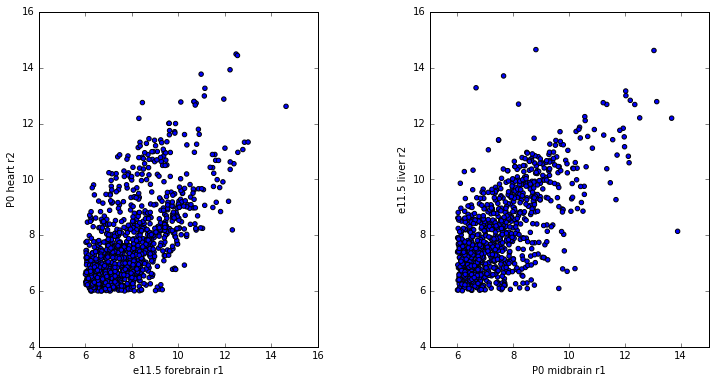

In [75]:
f = plot_replicate_comparison(
    tissue_13pg_fpkms[tissue_13pg_fpkms > 2**6], 'ENCLB917PKP', 'ENCLB348BMH', '', tissue_13pg_labels,
    tissue_13pg_fpkms[tissue_13pg_fpkms > 2**6], 'ENCLB719BQO', 'ENCLB905LVV', '', tissue_13pg_labels)

# Hierarchical Clustering by Score

One question we had was do replicates sort next to each other when we use hierarchical clustering metric using the various measures of corrleation as a distance matrix.

For this I used the SciPy <a href="http://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html#scipy.cluster.hierarchy.linkage">linkage</a> function using single linkage and euclidean distance and the correlation scores we computed earlier as the input distance metric. The plots are then created with the SciPy <a href="http://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.dendrogram.html#scipy.cluster.hierarchy.dendrogram">dendrogram</a> function.

In [76]:
from scipy.cluster import hierarchy

In [77]:
def plot_dendogram_for_distances(experiment_set, labels, experiment_name):
    scores = ['Naïve Pearson', 'Naïve Spearman', 'Rafa Pearson', 'Rafa Spearman', 'MAD', 'SD']
    fig, ax = pyplot.subplots(len(scores), 1, figsize=(6, 1.5 * len(labels) ))
    for i, score_name in enumerate(scores):
        ax[i].set_title(experiment_name + ' ' + score_name)
        rv = hierarchy.dendrogram(
            hierarchy.linkage(experiment_set[score_name]),
            labels=[ labels[x] for x in experiment_set[score_name].index],
            orientation='right',
            ax=ax[i]
        )

## Plot dendrogram for 13 pg tissue

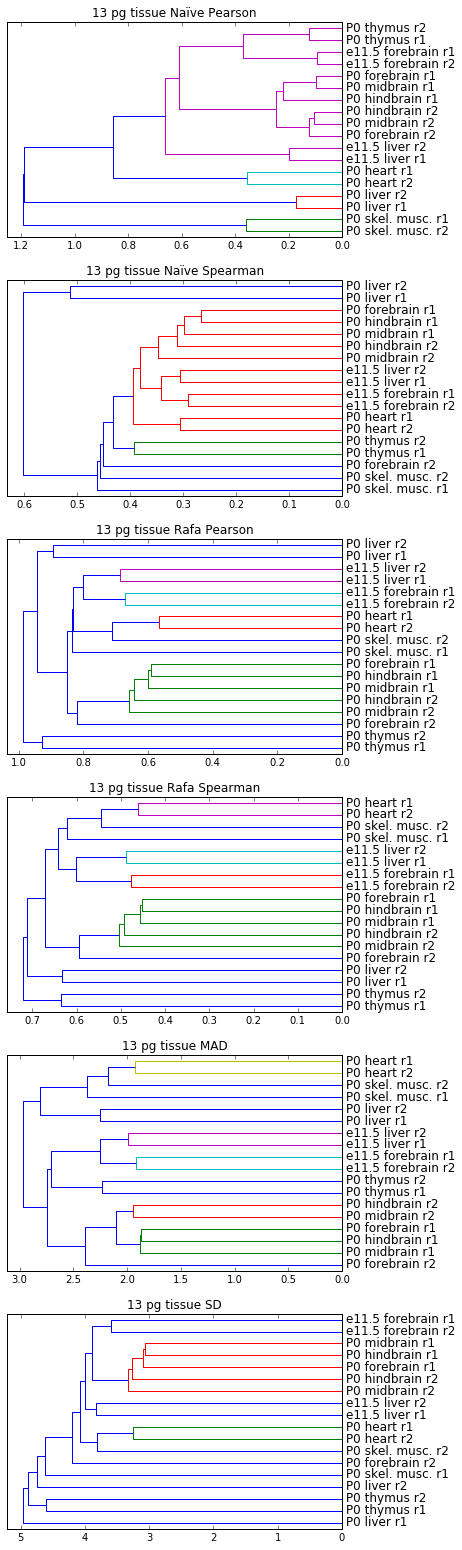

In [78]:
plot_dendogram_for_distances(tissue_13pg_scores, tissue_13pg_labels, '13 pg tissue')

## Plot dendrogram for 10 ng tissue

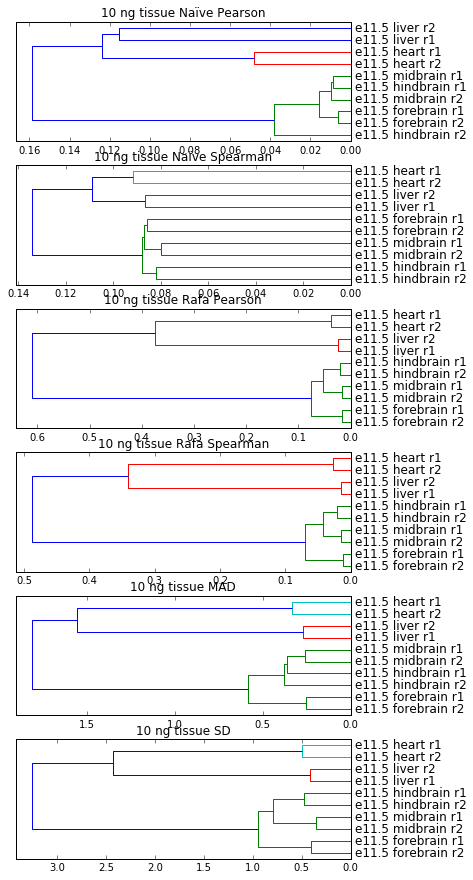

In [79]:
plot_dendogram_for_distances(tissue_10ng_scores, tissue_10ng_labels, '10 ng tissue')

## Plot dendrogram for bulk cell line

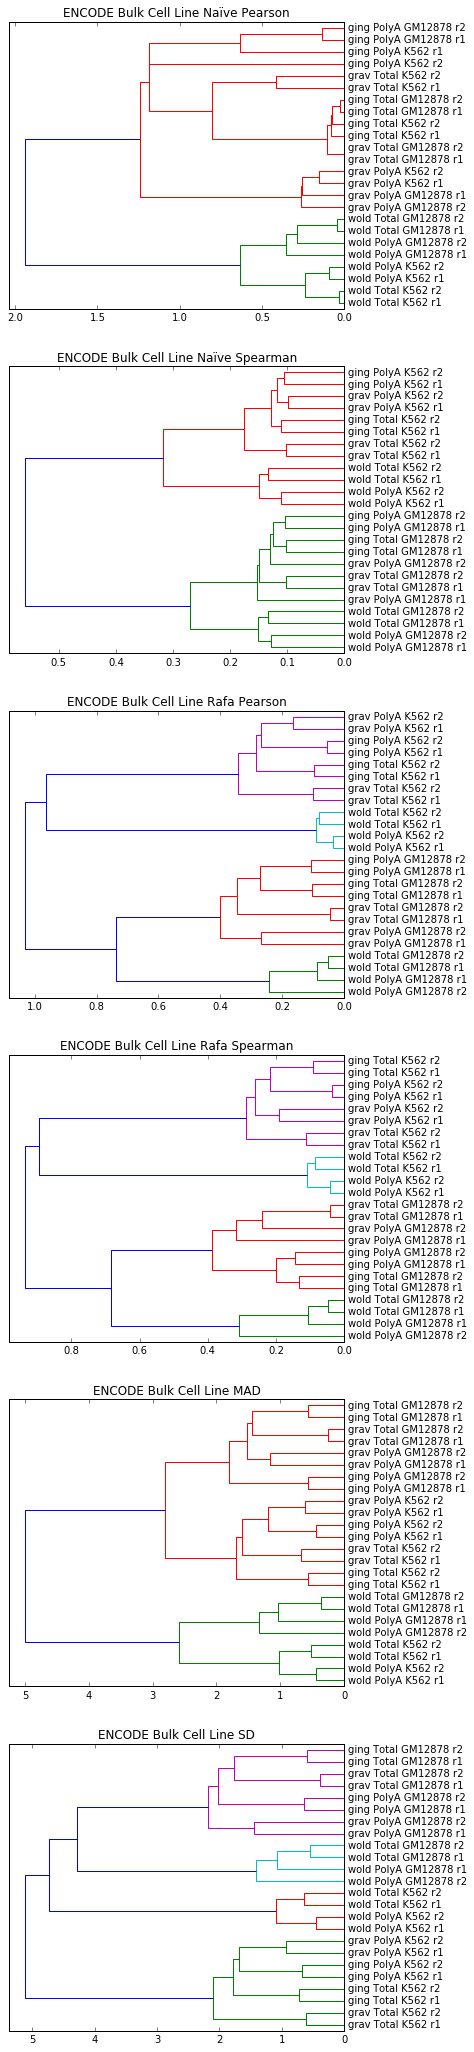

In [80]:
plot_dendogram_for_distances(bulk_cell_line_scores, bulk_cell_line_labels, 'ENCODE Bulk Cell Line')

# Compare score overlap between matched and mismatched replicates

## Code

Use bokeh plots instead of matplotlib so I can get tooltips showing information about a point.

In [82]:
from bokeh.plotting import figure, output_file, show, ColumnDataSource
from bokeh.io import output_notebook
from bokeh.models import HoverTool, CategoricalTickFormatter


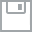
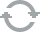
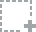
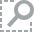
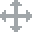
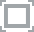
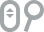
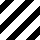
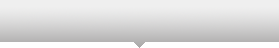
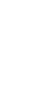
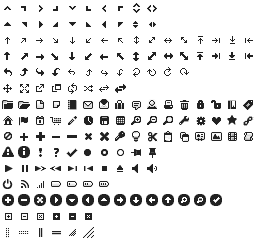
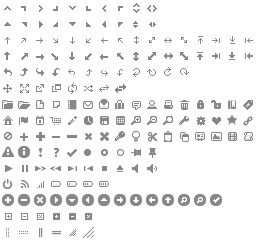
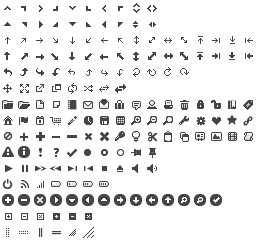
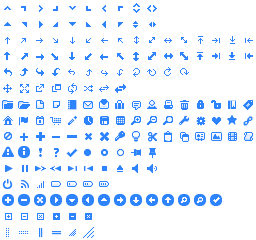
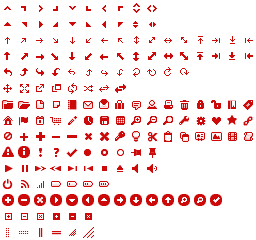
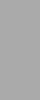
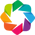
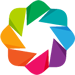

In [83]:
output_notebook()

In [98]:
def strip_chart_bokeh(scores, score_name, labels):
    corr = score = scores[score_name]
    good_pairs = [ set(x) for x in zip(labels.index[::2], labels.index[1::2])]

    hover = HoverTool(
        tooltips = [
            ('score', '$y'),
            ('desc', '@description'),
        ]
    )    

    good_data = {
        'x': [],
        'y': [],
        'description': [],
    }
    brain_data = {
        'x': [],
        'y': [],
        'description': [],        
    }
    bad_data = {
        'x': [],
        'y': [],
        'description': [],
        
    }
    # include self vs self sets
    seen = [ set((x,)) for x in list(labels.index) ]
    print(good_pairs)
    for row in labels.index:
        for col in labels.index:
            # the correlation of self vs self is too good. so lets ignore that.
            pair = {row, col}
            if pair in seen:
                continue
                
            seen.append(pair)
            x = numpy.random.normal(scale=.01)
            desc = '-'.join([ labels[l] for l in pair])
            isbrain = desc.count('brain') == 2
            isgood = pair in good_pairs
            
            if isbrain:
                brain_data['x'].append(x + 0 if isgood else 1)
                brain_data['y'].append(corr[row][col])
                brain_data['description'].append(desc)
            elif isgood:
                good_data['x'].append(x)
                good_data['y'].append(corr[row][col])
                good_data['description'].append(desc)
            else:
                bad_data['x'].append(x + 1 )
                bad_data['y'].append(corr[row][col])
                bad_data['description'].append(desc)

    fig = figure(tools=['wheel_zoom', 'resize', hover, 'reset', 'save'])
    fig.circle('x', 'y', legend='matched rep.', color='blue', size=5, source=ColumnDataSource(good_data))
    fig.circle('x', 'y', legend='brain', color='purple', size=5, source=ColumnDataSource(brain_data))
    fig.circle('x', 'y', legend='mismatched rep.', color='red', size=5, source=ColumnDataSource(bad_data))
    return fig
    #ax.set_xticks([0,1])
    #ax.set_xticklabels(['matched', 'mismatched'])
    #ax.set_ylabel(score_name)

In [99]:
tissue_10ng_labels.index

Index(['ENCLB835LVO', 'ENCLB471QMM', 'ENCLB055KYV', 'ENCLB357KYA',
       'ENCLB659UFY', 'ENCLB426JKF', 'ENCLB601XLL', 'ENCLB347FRI',
       'ENCLB454ZUS', 'ENCLB061TDP'],
      dtype='object')

In [100]:
[ tissue_10ng_labels[x] for x in tissue_10ng_scores['Naïve Spearman'].index]

['e11.5 liver r1',
 'e11.5 hindbrain r2',
 'e11.5 heart r2',
 'e11.5 liver r2',
 'e11.5 midbrain r2',
 'e11.5 hindbrain r1',
 'e11.5 forebrain r2',
 'e11.5 heart r1',
 'e11.5 midbrain r1',
 'e11.5 forebrain r1']

## 10 ng strip charts

In my first implementation using matplotlib there was a lot of overlapping scores for most of the scores, it was hard to identify which combination they were so I used Bokeh plots. I colored the brain samples seperately because they are very similar tissues, and tended to overlap even in the case of good 10 ng data.

### 10 ng Naive Spearman strip chart

In [101]:
fig = strip_chart_bokeh(tissue_10ng_scores, 'Naïve Spearman', tissue_10ng_labels)
fig.title = '10 ng Naïve Spearman'
fig.legend.orientation = 'bottom_left'
show(fig)

[{'ENCLB471QMM', 'ENCLB835LVO'}, {'ENCLB055KYV', 'ENCLB357KYA'}, {'ENCLB426JKF', 'ENCLB659UFY'}, {'ENCLB601XLL', 'ENCLB347FRI'}, {'ENCLB454ZUS', 'ENCLB061TDP'}]


### 10 ng Rafa Spearman strip chart

In [102]:
fig = strip_chart_bokeh(tissue_10ng_scores, 'Rafa Spearman', tissue_10ng_labels)
fig.title = '10 ng Rafa Spearman'
fig.legend.orientation = 'bottom_left'
show(fig)

[{'ENCLB471QMM', 'ENCLB835LVO'}, {'ENCLB055KYV', 'ENCLB357KYA'}, {'ENCLB426JKF', 'ENCLB659UFY'}, {'ENCLB601XLL', 'ENCLB347FRI'}, {'ENCLB454ZUS', 'ENCLB061TDP'}]


### 10 ng MAD strip chart

In [103]:
fig = strip_chart_bokeh(tissue_10ng_scores, 'MAD', tissue_10ng_labels)
fig.title = '10 ng MAD'
fig.legend.orientation = 'top_left'
show(fig)

[{'ENCLB471QMM', 'ENCLB835LVO'}, {'ENCLB055KYV', 'ENCLB357KYA'}, {'ENCLB426JKF', 'ENCLB659UFY'}, {'ENCLB601XLL', 'ENCLB347FRI'}, {'ENCLB454ZUS', 'ENCLB061TDP'}]


## 13 pg strip charts

## 13 pg Naive Spearman strip chart

In [104]:
fig = strip_chart_bokeh(tissue_13pg_scores, 'Naïve Spearman', tissue_13pg_labels)
fig.title = '13 pg Naïve Spearman'
fig.legend.orientation = 'bottom_left'
show(fig)

[{'ENCLB026BHP', 'ENCLB917PKP'}, {'ENCLB719BQO', 'ENCLB669AEL'}, {'ENCLB096HAH', 'ENCLB304LFK'}, {'ENCLB652HKH', 'ENCLB348BMH'}, {'ENCLB181TCJ', 'ENCLB766UOB'}, {'ENCLB449LBZ', 'ENCLB905LVV'}, {'ENCLB238LIR', 'ENCLB765HDK'}, {'ENCLB005HHX', 'ENCLB185MNU'}, {'ENCLB791CRT', 'ENCLB356IIP'}]


### 13 pg Rafa Spearman strip chart

In [105]:
fig = strip_chart_bokeh(tissue_13pg_scores, 'Rafa Spearman', tissue_13pg_labels)
fig.title = '13 pg Rafa Spearman'
fig.legend.orientation = 'bottom_left'
show(fig)

[{'ENCLB026BHP', 'ENCLB917PKP'}, {'ENCLB719BQO', 'ENCLB669AEL'}, {'ENCLB096HAH', 'ENCLB304LFK'}, {'ENCLB652HKH', 'ENCLB348BMH'}, {'ENCLB181TCJ', 'ENCLB766UOB'}, {'ENCLB449LBZ', 'ENCLB905LVV'}, {'ENCLB238LIR', 'ENCLB765HDK'}, {'ENCLB005HHX', 'ENCLB185MNU'}, {'ENCLB791CRT', 'ENCLB356IIP'}]


### 13 pg MAD strip chart

In [106]:
fig = strip_chart_bokeh(tissue_13pg_scores, 'MAD', tissue_13pg_labels)
fig.title = '13 pg MAD'
fig.legend.orientation = 'top_left'
show(fig)

[{'ENCLB026BHP', 'ENCLB917PKP'}, {'ENCLB719BQO', 'ENCLB669AEL'}, {'ENCLB096HAH', 'ENCLB304LFK'}, {'ENCLB652HKH', 'ENCLB348BMH'}, {'ENCLB181TCJ', 'ENCLB766UOB'}, {'ENCLB449LBZ', 'ENCLB905LVV'}, {'ENCLB238LIR', 'ENCLB765HDK'}, {'ENCLB005HHX', 'ENCLB185MNU'}, {'ENCLB791CRT', 'ENCLB356IIP'}]


### 13 pg SD strip chart

In [107]:
fig = strip_chart_bokeh(tissue_13pg_scores, 'SD', tissue_13pg_labels)
fig.title = '13 pg SD'
fig.legend.orientation = 'top_left'
show(fig)

[{'ENCLB026BHP', 'ENCLB917PKP'}, {'ENCLB719BQO', 'ENCLB669AEL'}, {'ENCLB096HAH', 'ENCLB304LFK'}, {'ENCLB652HKH', 'ENCLB348BMH'}, {'ENCLB181TCJ', 'ENCLB766UOB'}, {'ENCLB449LBZ', 'ENCLB905LVV'}, {'ENCLB238LIR', 'ENCLB765HDK'}, {'ENCLB005HHX', 'ENCLB185MNU'}, {'ENCLB791CRT', 'ENCLB356IIP'}]


## 13 pg strip charts with Acutoff > 6

some of my previous analysis suggested that you could start to recover some information if you limited yourself to higher fpkms.

In [108]:
tissue_13pg_a6_scores = compute_all_vs_all_scores(tissue_13pg_fpkms, Acutoff=6)

### 13 pg Rafa Spearman strip chart with Acutoff > 6

In [109]:
fig = strip_chart_bokeh(tissue_13pg_a6_scores, 'Rafa Spearman', tissue_13pg_labels)
fig.title = '13 pg Rafa Spearman Acutoff > 6'
fig.legend.orientation = 'bottom_left'
show(fig)

[{'ENCLB026BHP', 'ENCLB917PKP'}, {'ENCLB719BQO', 'ENCLB669AEL'}, {'ENCLB096HAH', 'ENCLB304LFK'}, {'ENCLB652HKH', 'ENCLB348BMH'}, {'ENCLB181TCJ', 'ENCLB766UOB'}, {'ENCLB449LBZ', 'ENCLB905LVV'}, {'ENCLB238LIR', 'ENCLB765HDK'}, {'ENCLB005HHX', 'ENCLB185MNU'}, {'ENCLB791CRT', 'ENCLB356IIP'}]


### 13 pg MAD strip chart with Acutoff > 6

In [110]:
fig = strip_chart_bokeh(tissue_13pg_a6_scores, 'MAD', tissue_13pg_labels)
fig.title = '13 pg MAD Acutoff > 6'
fig.legend.orientation = 'top_left'
show(fig)

[{'ENCLB026BHP', 'ENCLB917PKP'}, {'ENCLB719BQO', 'ENCLB669AEL'}, {'ENCLB096HAH', 'ENCLB304LFK'}, {'ENCLB652HKH', 'ENCLB348BMH'}, {'ENCLB181TCJ', 'ENCLB766UOB'}, {'ENCLB449LBZ', 'ENCLB905LVV'}, {'ENCLB238LIR', 'ENCLB765HDK'}, {'ENCLB005HHX', 'ENCLB185MNU'}, {'ENCLB791CRT', 'ENCLB356IIP'}]


### 13 pg SD strip chart with Acutoff > 6

In [111]:
fig = strip_chart_bokeh(tissue_13pg_a6_scores, 'SD', tissue_13pg_labels)
fig.title = '13 pg SD'
fig.legend.orientation = 'top_left'
show(fig)

[{'ENCLB026BHP', 'ENCLB917PKP'}, {'ENCLB719BQO', 'ENCLB669AEL'}, {'ENCLB096HAH', 'ENCLB304LFK'}, {'ENCLB652HKH', 'ENCLB348BMH'}, {'ENCLB181TCJ', 'ENCLB766UOB'}, {'ENCLB449LBZ', 'ENCLB905LVV'}, {'ENCLB238LIR', 'ENCLB765HDK'}, {'ENCLB005HHX', 'ENCLB185MNU'}, {'ENCLB791CRT', 'ENCLB356IIP'}]


# Conclusion

At least for the process of trying to verify that an 13 pg experiment performed as well as it could, it may be reasonable to only test replicate concordance by comparing transcripts above some FPKM threshold much higher than one. In this notebook I used a simple search, but it may be reasonable to see at what point the spike ins stop correlating well with themselves.

The justification for the higher threshold is that <a href="http://genome.cshlp.org/content/early/2013/12/03/gr.161034.113">From single-cell to cell-pool transcriptomes</a> figure 1, panel B and C, shows the probablity that the FPKM score is within 20% of the true value depends on the probability of being able to catch rare messages. Unfortunately it appears that the current chemistry still has a fairly low probability of being able to capture low abundance molecules.


# Future Work

* DONE Figure out how how to cluster on correlation scores to get related things next to each other.
* DONE Heat map of how much data is left after filtering.
* compute synthetic merged single cell data to compare against bulk data.
* DONE given a related tissue, show similar correlations plots between different amounts of input material.
  * also compare rank correlation of genes detected between 13 pg and 10 ng samples.
  * DONE venn diagrams of 13pg as subset of 10ng
    * DONE what are those in the 13pg only?
  * fraction of reads mapped. how do the reads mapped change as we go from 1, 10, 50, 1000 cells...
    * we only have 13 pg and 10 ng
  * Brian needs to find wet bench QC e.g. yield, bioanalyzer distribution
* DONE invert colors for MAD. (apparently many pyplot colormaps have a _r variant)
* DONE Generate strip charts for various correlation metrics
* Show Acutoff analysis on 10ng data

* T-tests? are your data one-tailed or two-tailed whats the variance? paired, samples with equal or unequal variance.
  * test the differences between 10 ng and 13 pg
  
* Thur with Barbara,
  * it'd be useful to see how the 13pg data compares to similar pool split data
  * what is revoke actually like
  * can we add a "really this is an example of how things can go wrong when you try to push the experiment to a very low level" description
  

# Comments from Cricket

When you present to barbara, let her know that i am close to having a grouping for her, but if it is single-cell isolation before RNA-seq, then no 13 pg data goes there


In [112]:
rep = tissue_13pg_fpkms[['ENCLB917PKP', 'ENCLB026BHP']]
logrep = numpy.log2(rep)
logrep[numpy.all(numpy.isfinite(logrep), axis=1)]

ENCLB917PKP  ENCLB026BHP
gene_id                                        
22050                     2.553361     2.778209
ENSMUSG00000000001.4      6.198691     6.158256
ENSMUSG00000000028.10     6.594549     5.115200
ENSMUSG00000000031.11     6.168722     6.555049
ENSMUSG00000000037.12     2.729009     2.485427
ENSMUSG00000000056.7      5.139961     4.178715
ENSMUSG00000000078.6      3.415488     3.795975
ENSMUSG00000000088.6      9.090774     9.149163
ENSMUSG00000000127.10     2.855990     4.280214
ENSMUSG00000000131.11     5.792595     3.605257
ENSMUSG00000000134.13     4.529821     4.294988
ENSMUSG00000000142.11     3.283922     0.978196
ENSMUSG00000000149.6      1.967169    -3.321928
ENSMUSG00000000167.10     4.034744     5.452530
ENSMUSG00000000168.5      5.264912     4.442943
ENSMUSG00000000171.4      7.317684     7.939403
ENSMUSG00000000184.9      7.586840     7.767721
ENSMUSG00000000194.9     -6.643856     5.388534
ENSMUSG00000000214.6      4.593951     3.658783
ENSMUSG00000000223.9      1.505891    -4.643856
ENSMUSG00000000244.12    -3.643856    -3.473931
ENSMUSG00000000247.7      5.201242     5.009437
ENSMUSG00000000253.8      4.867402     2.650765
ENSMUSG00000000278.10     6.111031     5.439623
ENSMUSG00000000295.8      5.609991     6.811985
ENSMUSG00000000303.8      3.569248     3.073820
ENSMUSG00000000305.8      2.292782     2.792855
ENSMUSG00000000325.11     3.942045     2.750607
ENSMUSG00000000326.8      6.461070     6.473787
ENSMUSG00000000339.10     5.564073     3.414136
...                            ...          ...
gSpikein_ERCC-00009       8.974415     6.912530
gSpikein_ERCC-00019      -4.058894    -4.058894
gSpikein_ERCC-00022       5.824259     4.569856
gSpikein_ERCC-00035       5.049631     4.789729
gSpikein_ERCC-00042       7.451870     8.573079
gSpikein_ERCC-00043       8.033974     8.088523
gSpikein_ERCC-00044       1.636915     4.060047
gSpikein_ERCC-00046      11.773959    11.464321
gSpikein_ERCC-00051      -2.321928     6.524503
gSpikein_ERCC-00060       8.514556     8.476706
gSpikein_ERCC-00071       6.133810     6.284107
gSpikein_ERCC-00074      14.627058    14.114335
gSpikein_ERCC-00076       7.597382     6.506526
gSpikein_ERCC-00078      -3.058894     4.418190
gSpikein_ERCC-00079       6.281327     4.103498
gSpikein_ERCC-00084       4.877744     4.419539
gSpikein_ERCC-00092       7.500483     7.091277
gSpikein_ERCC-00095       4.727920     6.762216
gSpikein_ERCC-00096      12.839855    12.548935
gSpikein_ERCC-00108       9.883438     9.074516
gSpikein_ERCC-00111       8.213882     6.889839
gSpikein_ERCC-00112       6.103917     5.873075
gSpikein_ERCC-00113      10.999944    10.837384
gSpikein_ERCC-00116       6.396605     5.858727
gSpikein_ERCC-00130      12.996240    12.742090
gSpikein_ERCC-00131       5.624978     7.088841
gSpikein_ERCC-00136       9.874705     9.549727
gSpikein_ERCC-00145       7.562853     7.396262
gSpikein_ERCC-00162       7.411087     4.631686
gSpikein_ERCC-00165       5.096768     6.187055

[9656 rows x 2 columns]

In [113]:
test = pandas.DataFrame(numpy.asarray([[0,1,1],[0,0,1]]).T)
test

0  1
0  0  0
1  1  0
2  1  1

In [114]:
numpy.isfinite(numpy.nan)

False

In [115]:
def genesbyfilter(fpkms):
    pairs = zip(fpkms.columns[::2], fpkms.columns[1::2])
    
    filtered = []
    names = []
    for rep1, rep2 in pairs:
        names.append(rep1)
        #print(rep1, rep2)
        #print(fpkms[rep1], fpkms[rep2])
        bothzero = (fpkms[rep1] == 0) & (fpkms[rep2] == 0)
        nonzero = (fpkms[rep1] == 0) | (fpkms[rep2] == 0)
        logrep1 = numpy.log2(fpkms[rep1][nonzero == False])
        logrep2 = numpy.log2(fpkms[rep2][nonzero == False])
        A = (logrep1 + logrep2) / 2.0
        Acutoff = 0
        rafaed = (A > Acutoff)
        filtered.append({
                'total': len(fpkms),
                'both zero': len(fpkms[rep1][bothzero == False]),
                'either zero': len(fpkms[rep1][nonzero == False]),
                'gt Acutoff': len(logrep1[rafaed == True]),
            })
    return pandas.DataFrame(filtered, index=names, columns=['total', 'both zero', 'either zero', 'gt Acutoff'])

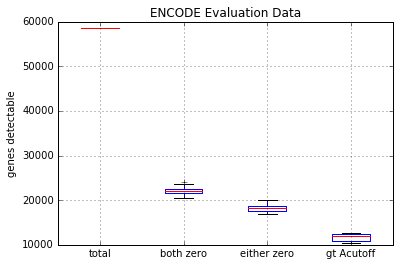

In [116]:
f = genesbyfilter(bulk_cell_line_fpkms)
fig, ax = pyplot.subplots(1,1)
a = f.boxplot(ax=ax, return_type='axes')
a.set_title('ENCODE Evaluation Data')
a.set_ylabel('genes detectable')
fig.savefig('/tmp/filtered_bulk_box.png')

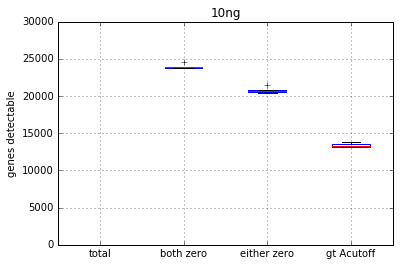

In [117]:
tissue_10ng_filters = genesbyfilter(tissue_10ng_fpkms)
fig, ax = pyplot.subplots(1,1)
a = tissue_10ng_filters.boxplot(ax=ax, return_type='axes')
a.set_title('10ng')
a.set_ylabel('genes detectable')
a.set_ylim((0,30000))
fig.savefig('/tmp/filtered_10ng_box.png')

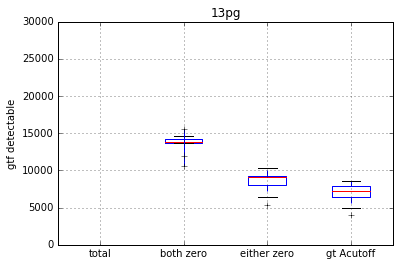

In [118]:
tissue_13pg_filters = genesbyfilter(tissue_13pg_fpkms)
fig, ax = pyplot.subplots(1,1)
a = tissue_13pg_filters.boxplot(ax=ax, return_type='axes')
a.set_title('13pg')
a.set_ylim((0,30000))
a.set_ylabel('gtf detectable')
fig.savefig('/tmp/filtered_13pg_box.png')

In [119]:
a.set_xticklabels?

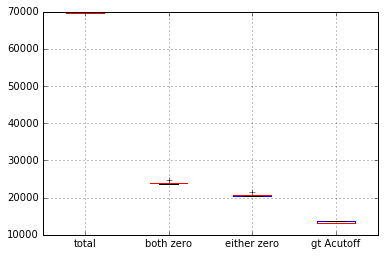

In [120]:
tissue_10ng_filters = genesbyfilter(tissue_10ng_fpkms)
f = tissue_10ng_filters.boxplot(return_type='axes')


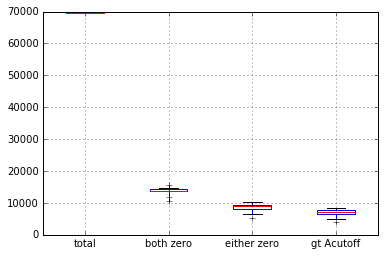

In [121]:
tissue_13pg_filters = genesbyfilter(tissue_13pg_fpkms)
f = tissue_13pg_filters.boxplot(return_type='axes')
